In [1696]:
import numpy as np
import ast
import heapq
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import warnings
from collections import deque



cali_trans = np.array([[  0.        ,   0.        ,   0.        , 1,
          0.        ],
       [466.98922175,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        , 482.45576649,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        , 531.94240303, 534.88991217,
        537.8348471 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        544.57966736],
       [539.39530067, 542.34668762, 545.296116  ,   0.        ,
          0.        ],
       [545.8128568 ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [551.93973806,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        , 593.61224713,
          0.        ],
       [  0.        ,   0.        , 594.66382175, 597.61197776,
          0.        ],
       [  0.        ,   0.        , 599.026636  ,   0.        ,
          0.        ],
       [  0.        , 600.6848481 , 603.6332481 ,   0.        ,
          0.        ],
       [602.56420404, 605.51640914,   0.        ,   0.        ,
          0.        ],
       [607.65989686, 610.60973092,   0.        ,   0.        ,
          0.        ],
       [613.18040057,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        596.88389115],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        603.77622285],
       [  0.        ,   0.        ,   0.        , 606.64997073,
        609.59632907],
       [  0.        ,   0.        , 609.01680555,   0.        ,
          0.        ],
       [  0.        ,   0.        , 613.93423117, 616.88226792,
        619.82677802],
       [  0.        ,   0.        , 618.46850091, 621.4167308 ,
          0.        ],
       [  0.        , 619.61628867, 622.56496579,   0.        ,
          0.        ],
       [  0.        , 623.099117  ,   0.        ,   0.        ,
          0.        ],
       [1,   0.        ,   0.        ,   0.        ,
          0.        ]])
all_trans = np.array([[  0.        , 457.75999873, 460.72196955, 463.68394036,
        466.62977127],
       [466.99294802, 469.97486848, 472.95678894, 475.93870939,
        478.92062985],
       [479.47904242, 482.46096288, 485.41016996, 488.35937703,
          0.        ],
       [  0.        ,   0.        , 531.94544764, 534.89326135,
        537.83854745],
       [  0.        , 535.74653352, 538.69236443, 541.63819534,
        544.58402625],
       [539.39912526, 542.35084521, 545.300608  , 548.26257881,
        551.22454963],
       [545.81732716, 548.79924762, 551.78116808, 554.76308853,
          0.        ],
       [551.94477172, 554.92669218, 557.90861264,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        , 593.61528986,
        596.56112077],
       [  0.        ,   0.        , 594.66692293, 597.61531136,
        600.56114227],
       [  0.        , 596.08091873, 599.0301258 , 601.99209662,
        604.95406743],
       [597.61531136, 600.68852942, 603.63732816, 606.65422318,
        609.60081274],
       [602.56807045, 605.52057971, 608.46978678, 611.41899386,
          0.        ],
       [607.66418416, 610.61441874, 613.56362581,   0.        ,
          0.        ],
       [613.18535061, 616.16727107,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        596.88713456],
       [  0.        ,   0.        ,   0.        , 600.83440408,
        603.78023499],
       [  0.        ,   0.        , 603.69225236, 606.65422318,
        609.60081274],
       [  0.        , 606.07214876, 609.02135584, 611.98332665,
        614.94529747],
       [608.04091204, 610.99011912, 613.93932619, 616.8876211 ,
        619.83247952],
       [612.5755976 , 615.52480467, 618.47401175, 621.42247375,
          0.        ],
       [616.63994273, 619.62186318, 622.57092288,   0.        ,
          0.        ],
       [620.12318854, 623.105109  ,   0.        ,   0.        ,
          0.        ],
       [620.45960741,   0.        ,   0.        ,   0.        ,
          0.        ]])

all_trans_test = np.array([[  0.        , 457.75999873, 460.72196955, 463.68394036,
        466.62977127],
       [466.99294802, 469.97486848, 472.95678894, 475.93870939,
        478.92062985],
       [479.47904242, 482.46096288, 485.41016996, 488.35937703,
          0.        ],
       [  0.        ,   0.        , 531.94544764, 534.89326135,
        537.83854745],
       [  0.        , 535.74653352, 538.69236443, 541.63819534,
        544.58402625],
       [539.39912526, 542.35084521, 545.300608  , 548.26257881,
        551.22454963],
       [545.81732716, 548.79924762, 551.78116808, 554.76308853,
          0.        ],
       [551.94477172, 554.92669218, 557.90861264,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        , 593.61528986,
        596.56112077],
       [  0.        ,   0.        , 594.66692293, 597.61531136,
        600.56114227],
       [  0.        , 596.08091873, 599.0301258 , 601.99209662,
        604.95406743],
       [597.61531136, 600.68852942, 603.63732816, 606.65422318,
        609.60081274],
       [602.56807045, 605.52057971, 608.46978678, 611.41899386,
          0.        ],
       [607.66418416, 610.61441874, 613.56362581,   0.        ,
          0.        ],
       [613.18535061, 616.16727107,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        596.88713456],
       [  0.        ,   0.        ,   0.        , 600.83440408,
        603.78023499],
       [  0.        ,   0.        , 603.69225236, 606.65422318,
        609.60081274],
       [  0.        , 606.07214876, 609.02135584, 611.98332665,
        614.94529747],
       [608.04091204, 610.99011912, 613.93932619, 616.8876211 ,
        619.83247952],
       [612.5755976 , 615.52480467, 618.47401175, 621.42247375,
          0.        ],
       [616.63994273, 619.62186318, 622.57092288,   0.        ,
          0.        ],
       [620.12318854, 623.105109  ,   0.        ,   0.        ,
          0.        ],
       [620.45960741,   0.        ,   0.        ,   0.        ,
          0.        ]])

all_trans_without_mf0 = np.array([[  0.        , 0, 0, 463.68394036,466.62977127],
       [466.99294802, 469.97486848, 0, 475.93870939,478.92062985],
       [479.47904242, 482.46096288, 0, 488.35937703,0.        ],
       [  0.        ,   0.        , 0, 534.89326135,537.83854745],
       [  0.        , 535.74653352, 0, 541.63819534,544.58402625],
       [539.39912526, 542.35084521, 545.300608  , 548.26257881,551.22454963],
       [545.81732716, 548.79924762, 0, 554.76308853,0.        ],
       [551.94477172, 554.92669218, 0,   0.        ,0.        ],
       [  0.        ,   0.        ,   0.        , 593.61528986,596.56112077],
       [  0.        ,   0.        , 0, 597.61531136,600.56114227],
       [  0.        , 596.08091873, 0 , 601.99209662,604.95406743],
       [597.61531136, 600.68852942, 0, 606.65422318,609.60081274],
       [602.56807045, 605.52057971, 0, 611.41899386, 0.        ],
       [607.66418416, 610.61441874, 0,   0.        ,0.        ],
       [613.18535061, 616.16727107,   0.        ,   0.        ,0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,596.88713456],
       [  0.        ,   0.        ,   0.        , 600.83440408,603.78023499],
       [  0.        ,   0.        , 0, 606.65422318,609.60081274],
       [  0.        , 606.07214876, 0, 611.98332665,614.94529747],
       [608.04091204, 610.99011912, 0, 616.8876211 ,619.83247952],
       [612.5755976 , 615.52480467, 0, 621.42247375,0.        ],
       [616.63994273, 619.62186318, 0,   0.        , 0.        ],
       [620.12318854, 623.105109  ,   0.        ,   0.        ,0.        ],
       [620.45960741,   0.        ,   0.        ,   0.        ,0.        ]])

transition_strengths = np.array([[np.nan, 0.0563, 0.055, 0.0519, 0.0341],
                        [0.0753, 0.0246, 0.0096, 0.0336, 0.056],
                        [0.053, 0.0598, 0.047, 0.0355, np.nan],
                        [np.nan, np.nan, 0.1103, 0.1061, 0.0819],
                        [np.nan, 0.1273, 0.0275, 0.0613, 0.0981],
                        [0.0973, 0.0635, 0.0919, 0.0258, 0.0932],
                        [0.1163, 0.0281, 0.0575, 0.107, np.nan],
                        [0.1105, 0.1056, 0.0814, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, 0.2813, 0.0091],
                        [np.nan, np.nan, 0.2288, 0.1549, 0.0415],
                        [np.nan, 0.1517, 0.2135, 0.0697, 0.0446],
                        [0.0763, 0.2008, 0.1741, 0.003, 0.0359],
                        [0.1367, 0.2351, 0.0773, 0.039, np.nan],
                        [0.2241, 0.1763, 0.0106, np.nan, np.nan],
                        [0.268, 0.0634, np.nan, np.nan, np.nan],
                        [np.nan, np.nan, np.nan, np.nan, 0.3278],
                        [np.nan, np.nan, np.nan, 0.0828, 0.268],
                        [np.nan, np.nan, 0.0019, 0.1664, 0.234],
                        [np.nan, 0.025, 0.0679, 0.2278, 0.1523],
                        [0.0232, 0.001, 0.156, 0.2077, 0.0915],
                        [0.0309, 0.0593, 0.206, 0.1694, np.nan],
                        [0.0276, 0.1438, 0.2401, np.nan, np.nan],
                        [0.0094, 0.2862, np.nan, np.nan, np.nan],
                        [0.3278, np.nan, np.nan, np.nan, np.nan]])

pi_t = [21.897, 41.031, 45.832, 35.6, 43.23]

pitime_n2 = pi_t[0] # [-2, 4, -4]
pitime_n1 = pi_t[1] # [-2, 3, -3]
pitime_0 = pi_t[2] # [2, 4, 2]
pitime_p1 = pi_t[3] # [2, 4, 3]
pitime_p2 = pi_t[4] # [2, 4, 4]

factors = np.array([pitime_n2*0.3278,pitime_n1*0.268,pitime_0*0.234,pitime_p1*0.268,pitime_p2*0.3278])

Fs = [1,2,3,4]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
col_labels = [-2, -1, 0, 1, 2]

pi_times = np.zeros((24,5))
for i in range(np.shape(transition_strengths)[0]):
    for j in range(np.shape(transition_strengths)[1]):
        # print(i,j)
        if not np.isnan(transition_strengths[i,j]):
            # print(row_labels[i][1],col_labels[j])
            delta_m = (row_labels[i][1]-col_labels[j])+2
            # print(delta_m)
            pi_times[i,j] = factors[delta_m]/transition_strengths[i,j]
print(np.round(pi_times,3))
def get_pi_times(transitions,matrix = pi_times):
    pi_times_list = []
    for transition in transitions:
        row_label = [transition[1],transition[2]]
        Fs = [1,2,3,4]
        states = []
        for i in Fs:
            for j in range(2*i+1):
                mF = i-j
                states.append([i,mF])
    
        row_labels = states
    
        col_label = transition[0]
    
        # Find the index of the row label
        row_index = next((i for i, label in enumerate(row_labels) if label == row_label), None)
        # Find the index of the column label
        col_index = col_labels.index(col_label)
        
        if row_index is not None and col_index in range(len(col_labels)):
            pi_times_list.append(matrix[row_index, col_index])
        else:
            pi_times_list.append(np.nan)

    return pi_times_list


an1_pitimes = np.genfromtxt('PiTime_scale_param.txt', delimiter=',', dtype=float)
# print(an1_pitimes)
pitime_n2 = pi_t[0] # [-2, 4, -4]
pitime_n1 = pi_t[1] # [-2, 3, -3]
pitime_0 = pi_t[2] # [2, 4, 2]
pitime_p1 = pi_t[3] # [2, 4, 3]
pitime_p2 = pi_t[4] # [2, 4, 4]

factors_an1 = np.array([pitime_n2,pitime_n1,pitime_0,pitime_p1,pitime_p2])

Fs = [1,2,3,4]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
col_labels = [-2, -1, 0, 1, 2]

pi_times_an1 = np.zeros((24,5))
for i in range(np.shape(an1_pitimes)[0]):
    for j in range(np.shape(an1_pitimes)[1]):
        # print(i,j)
        if not np.isnan(an1_pitimes[i,j]):
            # print(row_labels[i][1],col_labels[j])
            delta_m = (row_labels[i][1]-col_labels[j])+2
            # print(delta_m)
            pi_times_an1[i,j] = factors_an1[delta_m]*an1_pitimes[i,j]
print(np.round(pi_times_an1,3))
# print(np.round(pi_times - pi_times_an1,3))

[[   0.     251.701  173.469  206.641  322.472]
 [ 188.191  387.837 1117.155  327.271  128.176]
 [ 180.015  179.343  233.964  202.193    0.   ]
 [   0.       0.     128.475   89.923  130.949]
 [   0.     111.318  346.938  174.954  112.093]
 [ 145.64   150.249  116.7    426.213   77.015]
 [  82.036  381.661  191.24    67.083    0.   ]
 [  97.056  104.132   88.18     0.       0.   ]
 [   0.       0.       0.      50.376 1048.44 ]
 [   0.       0.      61.935   61.593  258.426]
 [   0.      93.413   44.688  153.869  246.554]
 [ 185.725   47.514   61.601 3665.436  199.94 ]
 [  69.794   45.618  142.255  184.047    0.   ]
 [  47.857   62.373  677.154    0.       0.   ]
 [  41.031  113.215    0.       0.       0.   ]
 [   0.       0.       0.       0.      43.23 ]
 [   0.       0.       0.     171.145   35.6  ]
 [   0.       0.    7458.313   57.337   45.832]
 [   0.     566.832  140.513   47.079   72.202]
 [ 610.81  9540.8     68.748   52.943   78.446]
 [ 308.764  180.855   53.38    42.372   

In [2046]:
print(np.round((pi_times_an1 - pi_times)/pi_times_an1,3))

[[   nan   -inf -0.022  0.04    -inf]
 [-0.004   -inf   -inf   -inf   -inf]
 [-0.011  0.019   -inf   -inf    nan]
 [   nan    nan -0.02  -0.004 -0.   ]
 [   nan   -inf   -inf   -inf -0.01 ]
 [-0.021 -0.012  0.008   -inf  0.07 ]
 [ 0.004   -inf   -inf   -inf    nan]
 [ 0.003   -inf   -inf    nan    nan]
 [   nan    nan    nan -0.007   -inf]
 [   nan    nan -0.013 -0.008   -inf]
 [   nan   -inf -0.01  -0.015   -inf]
 [  -inf -0.003  0.001   -inf   -inf]
 [ 0.003  0.022  0.012   -inf    nan]
 [ 0.007  0.003   -inf    nan    nan]
 [ 0.      -inf    nan    nan    nan]
 [   nan    nan    nan    nan  0.   ]
 [   nan    nan    nan   -inf  0.   ]
 [   nan    nan   -inf  0.007  0.   ]
 [   nan   -inf -0.013   -inf  0.072]
 [  -inf   -inf  0.021  0.011 -0.009]
 [  -inf   -inf -0.01  -0.003    nan]
 [  -inf -0.01  -0.007    nan    nan]
 [  -inf  0.007    nan    nan    nan]
 [ 0.       nan    nan    nan    nan]]


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_27700\1144722018.py:1: RuntimeWarning: divide by zero encountered in divide
  print(np.round((pi_times_an1 - pi_times)/pi_times_an1,3))
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_27700\1144722018.py:1: RuntimeWarning: invalid value encountered in divide
  print(np.round((pi_times_an1 - pi_times)/pi_times_an1,3))


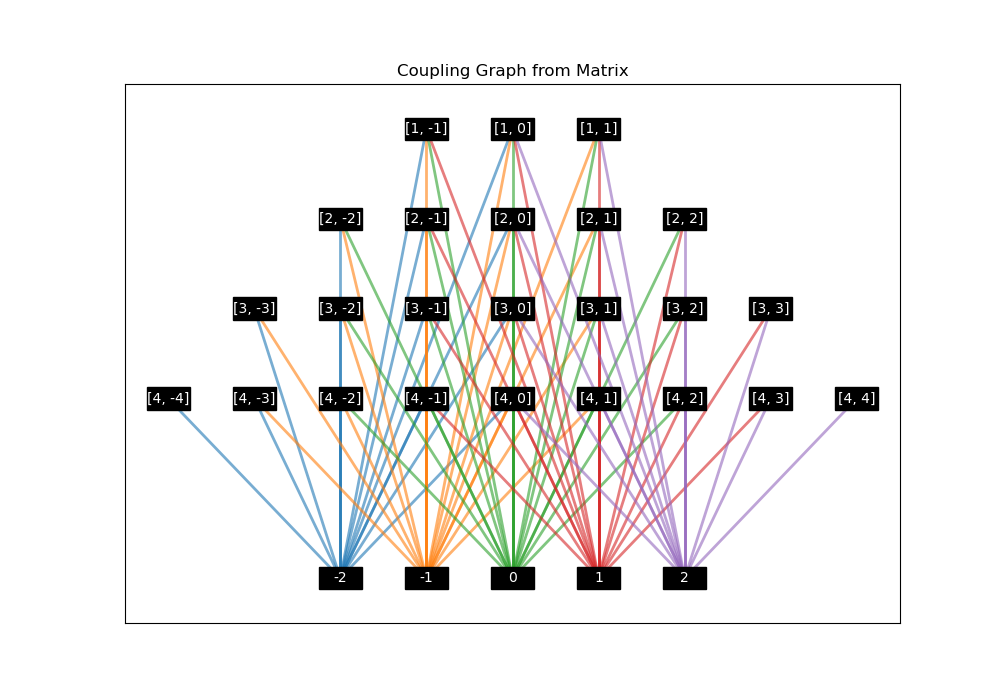

501
(['[4, -1]', '1', '[2, -1]', '-2', '[3, -3]'], 5, 232.52181542941594, [42.37211688311688, 67.08258504672897, 82.03611349957008, 41.031])


In [1973]:
import heapq
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import warnings
from collections import deque

# Suppress specific numpy deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning, message="`alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.")


def plot_coupling_graph_from_matrix(matrix,transition_strengths = transition_strengths, pos=None, show_graph = True):

    rows, cols = matrix.shape

    # Create a bipartite graph
    G = nx.Graph()
    Fs = [1, 2, 3, 4]
    row_labels = []
    for i in Fs:
        for j in range(2 * i + 1):
            mF = i - j
            row_labels.append([i, mF])
    col_labels = [-2, -1, 0, 1, 2]

    # Add edges based on non-zero elements in the matrix and assign weights
    for i in range(rows):
        for j in range(cols):
            if matrix[i, j] != 0:
                # print(transition_strengths[i, j])
                G.add_edge(f"{row_labels[i]}", f"{col_labels[j]}", weight=transition_strengths[i, j])

    # Generate positions for the nodes
    if pos is None:
        pos = {
            '-2': (-2, -2),
            '-1': (-1, -2),
            '0': (0, -2),
            '1': (1, -2),
            '2': (2, -2),
        }
    for i in row_labels:
        pos[f"{i}"] = (i[1], abs(i[0] - 4))
    for i in row_labels:
        G.add_node(f"{i}", pos=pos[f'{i}'])
    for j in col_labels:
        G.add_node(f"{j}", pos=pos[f'{i}'])
    if show_graph:
        colors = list(mcolors.TABLEAU_COLORS.values())
    
        plt.figure(figsize=(10, 7))
    
        for j in range(cols):
            edges = [(f"{row_labels[i]}", f"{col_labels[j]}") for i in range(rows) if matrix[i, j] != 0]
            weights = [matrix[i, j] for i in range(rows) if matrix[i, j] != 0]
            nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors[j % len(colors)], width=2, alpha=0.6)
    
        # Draw nodes with rectangular patches
        xh = 0.5
        yh = 0.25
        ax = plt.gca()
        for node, (x, y) in pos.items():
            ax.add_patch(Rectangle((x - xh / 2, y - yh / 2), xh, yh, fill=True, color='black', ec='black', lw=1))
    
        nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')
    
        # Draw edge labels (weights)
        # edge_labels = nx.get_edge_attributes(G, 'weight')
        # nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    
        plt.xlim(-4.5, 4.5)
        plt.ylim(-2.5, 3.5)
    
        # Show the plot
        plt.title('Coupling Graph from Matrix')
        plt.show()

    return G


from collections import deque

# def find_shortest_paths_with_min_weight(start_node, end_node,matrix = all_trans,transition_strengths = transition_strengths,  min_weight=0.0519):

#     G = plot_coupling_graph_from_matrix(matrix, transition_strengths,show_graph = False)
#     queue = deque([[start_node]])
#     shortest_paths = []
#     shortest_length = float('inf')

#     while queue:
#         path = queue.popleft()
#         node = path[-1]

#         if node == end_node:
#             path_length = len(path)
#             total_weight = sum(G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1))
#             if path_length < shortest_length:
#                 shortest_paths = [(path, path_length, total_weight)]
#                 shortest_length = path_length
#             elif path_length == shortest_length:
#                 shortest_paths.append((path, path_length, total_weight))
#         else:
#             for neighbor in G.neighbors(node):
#                 if neighbor not in path:  # Avoid cycles
#                     edge_weight = G[node][neighbor]['weight']
#                     if edge_weight >= min_weight:
#                         new_path = list(path)
#                         new_path.append(neighbor)
#                         queue.append(new_path)

#     return shortest_paths

def find_shortest_paths_with_min_weight(start_node, end_node,matrix = all_trans,weight_matrix = transition_strengths,  min_weight=0):
    G = plot_coupling_graph_from_matrix(matrix, weight_matrix, show_graph=False)
    G_strength = plot_coupling_graph_from_matrix(matrix, transition_strengths, show_graph=False)
    queue = deque([[start_node]])
    shortest_paths = []
    shortest_length = float('inf')

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node == end_node:
            path_length = len(path)
            list_of_weights = [G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)]
            total_weight_product = np.sum([G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)])
            # print([G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)],np.prod([G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1)]))
            # if path_length < shortest_length:
            #     shortest_paths = [(path, path_length, total_weight_product)]
            #     shortest_length = path_length
            # elif path_length == shortest_length:
            shortest_paths.append((path, path_length, total_weight_product,list_of_weights))

        else:
            for neighbor in G.neighbors(node):
                # print(neighbor)
                # print(path)
                if neighbor not in path:  # Avoid cycles
                    edge_weight = G_strength[node][neighbor]['weight']
                    if edge_weight >= min_weight:
                        new_path = list(path)
                        new_path.append(neighbor)
                        queue.append(new_path)
        if len(shortest_paths) > 500:
            break
    return shortest_paths


G = plot_coupling_graph_from_matrix(all_trans)
start_node = '[4, -1]'
end_node = '[3, -3]'
shortest_paths_with_weights = find_shortest_paths_with_min_weight(start_node, end_node,matrix = transition_strengths, weight_matrix = pi_times)
# print(shortest_paths_with_weights)
# Print the shortest paths with their lengths and total weights
print(len(shortest_paths_with_weights))

fastest_path = min(shortest_paths_with_weights, key=lambda x: x[2])
print(fastest_path)

In [1710]:
import time

Fs = [1, 2, 3, 4]
row_labels = []
for i in Fs:
    for j in range(2 * i + 1):
        mF = i - j
        row_labels.append([i, mF])

col_labels = [-2,-1,0,1,2]

all_labels = row_labels + col_labels

list_all_fastest_paths = []
start_time = time.time()
for i in all_labels:
    for j in all_labels:
        start_node = str(i)
        end_node = str(j)
        shortest_paths_with_weights = find_shortest_paths_with_min_weight(start_node, end_node,matrix = all_trans,weight_matrix = pi_times)
        fastest_path = min(shortest_paths_with_weights, key=lambda x: x[2])
        current_time = time.time()
        print(current_time-start_time,' ',start_node, end_node, fastest_path)
        list_all_fastest_paths.append(fastest_path)
        


0.000997781753540039   [1, 1] [1, 1] (['[1, 1]'], 1, 0.0, [])
1.268972396850586   [1, 1] [1, 0] (['[1, 1]', '1', '[4, 2]', '2', '[1, 0]'], 5, 437.985579316204, [206.641387283237, 57.33653846153847, 45.832, 128.17565357142854])
1.3776814937591553   [1, 1] [1, -1] (['[1, 1]', '0', '[1, -1]'], 3, 407.433090909091, [173.46909090909094, 233.96400000000003])
1.5013511180877686   [1, 1] [2, 2] (['[1, 1]', '1', '[2, 2]'], 3, 296.56410170359516, [206.641387283237, 89.92271442035816])
1.615046739578247   [1, 1] [2, 1] (['[1, 1]', '-1', '[2, 1]'], 3, 363.01959098589504, [251.70149200710478, 111.31809897879026])
1.7127854824066162   [1, 1] [2, 0] (['[1, 1]', '0', '[2, 0]'], 3, 290.16863389059256, [173.46909090909094, 116.69954298150164])
1.8159830570220947   [1, 1] [2, -1] (['[1, 1]', '1', '[2, -1]'], 3, 273.723972329966, [206.641387283237, 67.08258504672897])
2.4669337272644043   [1, 1] [2, -2] (['[1, 1]', '0', '[2, -2]'], 3, 261.64890171990174, [173.46909090909094, 88.1798108108108])
2.599086761

In [1700]:
list_all_fastest_paths

[(['[1, 1]'], 1, 0.0),
 (['[1, 1]', '1', '[4, 2]', '2', '[1, 0]'], 5, 437.985579316204),
 (['[1, 1]', '0', '[1, -1]'], 3, 407.433090909091),
 (['[1, 1]', '1', '[2, 2]'], 3, 296.56410170359516),
 (['[1, 1]', '-1', '[2, 1]'], 3, 363.01959098589504),
 (['[1, 1]', '0', '[2, 0]'], 3, 290.16863389059256),
 (['[1, 1]', '1', '[2, -1]'], 3, 273.723972329966),
 (['[1, 1]', '0', '[2, -2]'], 3, 261.64890171990174),
 (['[1, 1]', '1', '[3, 3]'], 3, 257.01747686731096),
 (['[1, 1]', '0', '[3, 2]'], 3, 235.40437937062939),
 (['[1, 1]', '0', '[3, 1]'], 3, 218.156678731105),
 (['[1, 1]', '0', '[3, 0]'], 3, 235.06982611874056),
 (['[1, 1]', '-1', '[3, -1]'], 3, 297.3190504928555),
 (['[1, 1]', '-1', '[3, -2]'], 3, 314.074197622533),
 (['[1, 1]', '-1', '[3, -3]'], 3, 364.91658033518047),
 (['[1, 1]', '1', '[4, 2]', '2', '[4, 4]'], 5, 353.0399257447755),
 (['[1, 1]', '1', '[4, 2]', '2', '[4, 3]'], 5, 345.4099257447755),
 (['[1, 1]', '1', '[4, 2]'], 3, 263.97792574477546),
 (['[1, 1]', '1', '[4, 1]'], 3, 25

In [1701]:
# import numpy as np

# # Your data
# data = list_all_fastest_paths
# # Function to check if a string is a node
# def is_node(s):
#     # return s.startswith('[') and s.endswith(']')
#     return True

# # Initialize lists to store nodes in the order they appear
# all_nodes_in_order = []
# node_set = set()  # To keep track of nodes that have been added

# # Map nodes to indices
# node_to_index = {}
# index_to_node = []

# # Collect nodes in order
# for path_taken, _, _ in data:
#     for element in path_taken:
#         if is_node(element) and element not in node_set:
#             node_set.add(element)
#             all_nodes_in_order.append(element)
#             node_to_index[element] = len(all_nodes_in_order) - 1
#             index_to_node.append(element)

# # Number of nodes
# num_nodes = len(all_nodes_in_order)

# # Initialize the matrix with NaNs
# matrix = np.full((num_nodes, num_nodes), np.nan)

# # Fill the matrix with path lengths
# for path_taken, _, total_time in data:
#     # Extract start and end nodes
#     start_node = next((node for node in path_taken if is_node(node)), None)
#     end_node = next((node for node in reversed(path_taken) if is_node(node)), None)
    
#     if start_node and end_node:
#         start_idx = node_to_index[start_node]
#         end_idx = node_to_index[end_node]
#         matrix[start_idx, end_idx] = total_time

# # Function to print the matrix with labels
# def print_matrix(matrix, row_labels, col_labels):
#     # Print column headers
#     header = "          " + " ".join(f"{label:>10}" for label in col_labels)
#     print(header)
#     # Print each row with row label
#     for row_label, row in zip(row_labels, matrix):
#         row_str = f"{row_label:>10}" + " ".join(f"{val:10.2f}" if not np.isnan(val) else f"{'NaN':>10}" for val in row)
#         print(row_str)


In [1703]:
import pandas as pd

# Your data
data = list_all_fastest_paths

# Function to check if a string is a node
def is_node(s):
    # return s.startswith('[') and s.endswith(']')
    return True

# Collect all unique nodes
nodes = set()
for path_taken, _, _ in data:
    for element in path_taken:
        if is_node(element):
            nodes.add(element)

nodes = sorted(nodes)

# Initialize the matrix as a DataFrame
matrix_df_S12 = pd.DataFrame(index=nodes, columns=nodes)

# Fill the matrix
for path_taken, _, total_time in data:
    # Extract start and end nodes
    start_node = next((node for node in path_taken if is_node(node)), None)
    end_node = next((node for node in reversed(path_taken) if is_node(node)), None)
    
    # Extract single-digit nodes
    single_digit_nodes = tuple(int(element) for element in path_taken if element.lstrip('-').isdigit())
    
    if start_node and end_node:
        # Save the tuple of single-digit nodes in the matrix
        matrix_df_S12.loc[start_node, end_node] = single_digit_nodes

# Display the matrix
print(matrix_df_S12)


                 -1        -2        0           1        2 [1, -1]    [1, 0]  \
-1            (-1,)  (-1, -2)  (-1, 0)  (-1, 0, 1)  (-1, 2)   (-1,)  (-1, -2)   
-2         (-2, -1)     (-2,)  (-2, 0)     (-2, 1)  (-2, 2)   (-2,)     (-2,)   
0           (0, -1)   (0, -2)     (0,)      (0, 1)   (0, 2)    (0,)    (0, 2)   
1        (1, 0, -1)   (1, -2)   (1, 0)        (1,)   (1, 2)    (1,)    (1, 2)   
2           (2, -1)   (2, -2)   (2, 0)      (2, 1)     (2,)  (2, 1)      (2,)   
[1, -1]       (-1,)     (-2,)     (0,)        (1,)   (1, 2)      ()     (-2,)   
[1, 0]     (-2, -1)     (-2,)   (2, 0)      (2, 1)     (2,)   (-2,)        ()   
[1, 1]        (-1,)   (1, -2)     (0,)        (1,)   (1, 2)    (0,)    (1, 2)   
[2, -1]    (-2, -1)     (-2,)   (1, 0)        (1,)   (1, 2)   (-2,)     (-2,)   
[2, -2]       (-1,)     (-2,)     (0,)      (0, 1)   (0, 2)   (-2,)     (-2,)   
[2, 0]        (-1,)     (-2,)     (0,)      (2, 1)     (2,)   (-2,)      (2,)   
[2, 1]        (-1,)  (-1, -2

In [1704]:
import pandas as pd

# Your data
data = list_all_fastest_paths
# Function to check if a string is a node
def is_node(s):
    # return s.startswith('[') and s.endswith(']')
    return True

# Collect all unique nodes
nodes = set()
for path_taken, _, _ in data:
    for element in path_taken:
        if is_node(element):
            nodes.add(element)

nodes = sorted(nodes)

# Initialize the matrix as a DataFrame
matrix_df = pd.DataFrame(index=nodes, columns=nodes)

# Fill the matrix
for path_taken, _, total_time in data:
    # Extract start and end nodes
    start_node = next((node for node in path_taken if is_node(node)), None)
    end_node = next((node for node in reversed(path_taken) if is_node(node)), None)
    
    if start_node and end_node:
        matrix_df.loc[start_node, end_node] = total_time

# Display the matrix
print(matrix_df)


                 -1          -2           0           1           2  \
-1              0.0  110.229412  106.364654  202.116907  223.410943   
-2       110.229412         0.0  185.235811  149.118699   222.65564   
0        106.364654  185.235811         0.0   95.752253  147.194302   
1        202.116907  149.118699   95.752253         0.0  103.168538   
2        223.410943   222.65564  147.194302  103.168538         0.0   
[1, -1]  179.342609  180.015094     233.964   202.19258  305.361119   
[1, 0]   298.420568  188.191155  275.369955  231.344192  128.175654   
[1, 1]   251.701492  355.760086  173.469091  206.641387  309.809926   
[2, -1]  192.265526   82.036113  162.834838   67.082585  170.251124   
[2, -2]  104.131705      97.056   88.179811  183.932064  235.374112   
[2, 0]   150.248819  145.640226  116.699543  180.183953   77.015414   
[2, 1]   111.318099  221.547511  217.682753  174.954127  112.092844   
[2, 2]   234.839667  239.041413  128.475014   89.922714  130.948571   
[3, -1

In [1722]:
Fs = [1, 2, 3, 4]
row_labels = []
for i in Fs:
    for j in range(2 * i + 1):
        mF = i - j
        row_labels.append([i, mF])

col_labels = [-2,-1,0,1,2]

all_labels = row_labels + col_labels
pi_times_array = np.zeros([29,29])
for i,r in enumerate(all_labels):
    for j,c in enumerate(all_labels):
        pi_times_array[i,j] = matrix_df.loc[str(r),str(c)]

S12_nodes_array = np.empty((29, 29), dtype=object)
for i,r in enumerate(all_labels):
    for j,c in enumerate(all_labels):
        S12_nodes_array[i,j] = matrix_df_S12.loc[str(r),str(c)]

[[  0.         437.98557932 407.43309091 296.5641017  363.01959099
  290.16863389 273.72397233 261.64890172 257.01747687 235.40437937
  218.15667873 235.06982612 297.31905049 314.07419762 364.91658034
  353.03992574 345.40992574 263.97792574 253.72079027 242.21709091
  226.84922683 203.36428708 276.78128446 377.65708583 355.76008583
  251.70149201 173.46909091 206.64138728 309.80992574]
 [437.98557932   0.         368.20624972 259.124225   240.26849761
  205.19106773 270.22726888 285.24715538 281.72028162 292.93747802
  320.05754303 328.11539173 257.98486423 236.04786221 229.22215538
  171.40565357 163.77565357 174.00765357 200.37728194 206.62195521
  273.71630892 305.26515138 323.50036027 210.08815538 188.19115538
  298.42056782 275.36995521 231.34419203 128.17565357]
 [407.43309091 368.20624972   0.         292.1152947  290.66070767
  325.65532044 262.05120784 277.07109434 252.56866987 263.78586627
  272.7558849  226.85655292 224.96016718 227.87180117 221.04609434
  348.59111874 340.

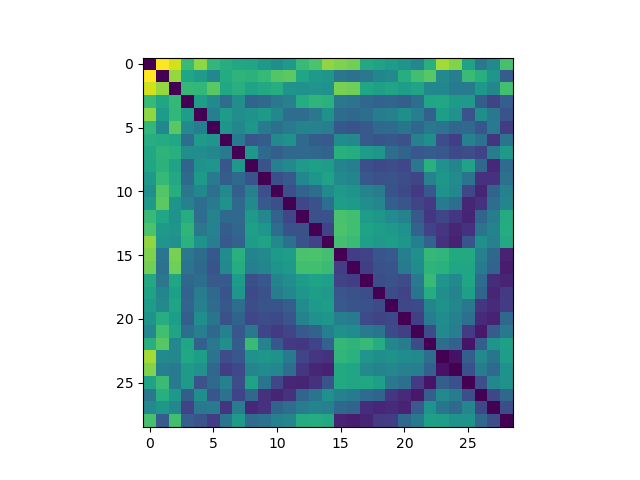

In [1724]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(pi_times_array)
print(pi_times_array)
plt.show()

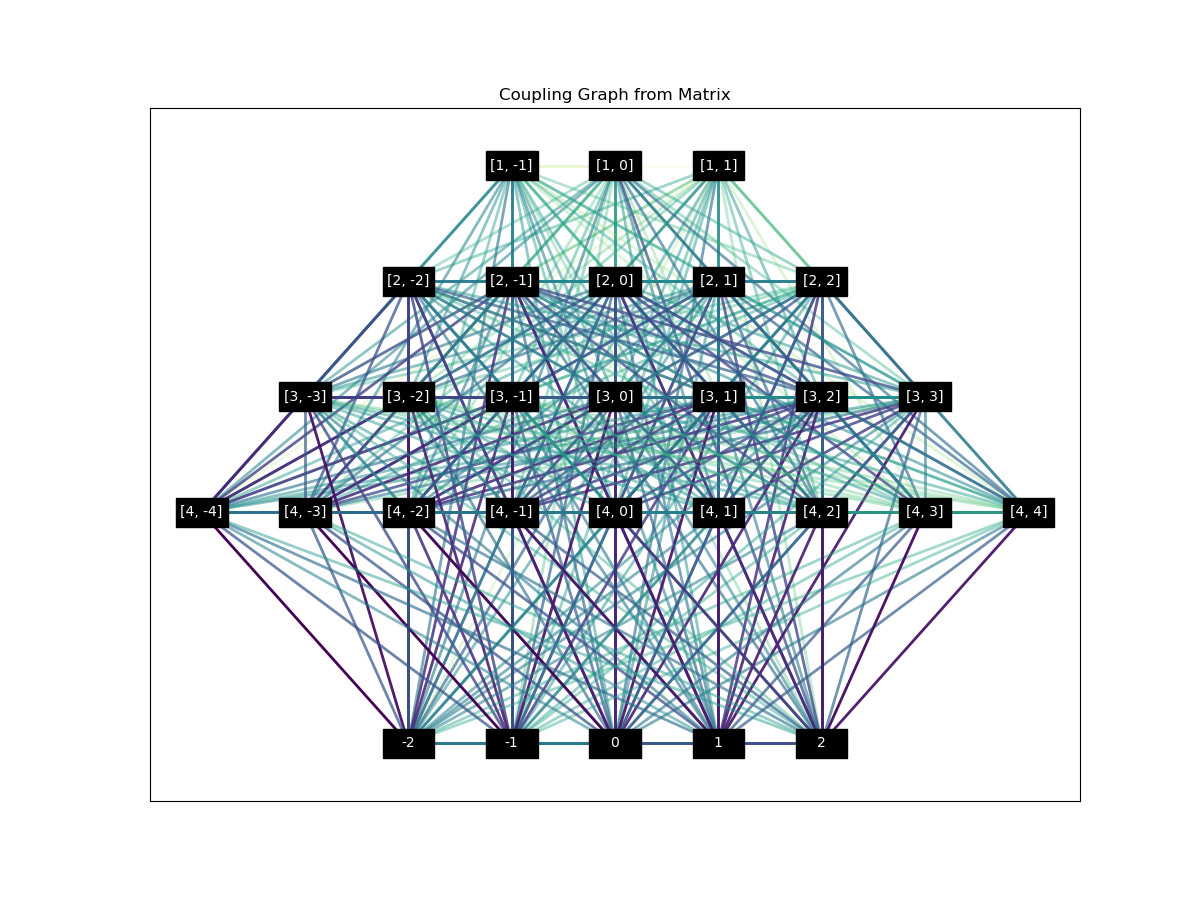

The total number of edges in G is 406


In [1749]:
def plot_coupling_graph_from_matrix(matrix, transition_strengths=None, pos=None, show_graph=True):
    import networkx as nx
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    from matplotlib.patches import Rectangle
    import numpy as np  # Ensure numpy is imported

    rows, cols = matrix.shape

    # Create a graph
    G = nx.Graph()

    # Combine row_labels and col_labels into a single labels list
    labels = []

    Fs = [1, 2, 3, 4]
    for i in Fs:
        for j in range(2 * i + 1):
            mF = i - j
            labels.append([i, mF])

    col_labels = [-2, -1, 0, 1, 2]
    for c in col_labels:
        labels.append(c)

    # Add edges based on non-zero elements in the matrix and assign weights
    for i in range(rows):
        for j in range(cols):
            if matrix[i, j] != 0:
                G.add_edge(f"{labels[i]}", f"{labels[j]}", weight=transition_strengths[i, j])

    # Generate positions for the nodes
    if pos is None:
        pos = {}
        for idx, label in enumerate(labels):
            if isinstance(label, list):
                F, mF = label
                x = mF
                y = abs(F - 4)
                pos[f"{label}"] = (x, y)
            else:
                # label is an integer
                x = label
                y = -2
                pos[f"{label}"] = (x, y)

    # Add nodes to the graph with positions
    for label in labels:
        G.add_node(f"{label}", pos=pos[f'{label}'])

    if show_graph:
        plt.figure(figsize=(12, 9))

        edges = list(G.edges())
        weights = np.array([G[u][v]['weight'] for u, v in edges])

        # Normalize the weights to range between 0 and 1
        norm = plt.Normalize(vmin=np.min(weights), vmax=np.max(weights))

        # Choose the 'viridis' colormap
        cmap = plt.cm.viridis

        # Map the weights to colors
        edge_colors = cmap(norm(weights))

        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_colors, width=2,alpha = (1-norm(weights)))

        # Draw nodes with rectangular patches
        xh = 0.5
        yh = 0.25
        ax = plt.gca()
        for node, (x, y) in pos.items():
            ax.add_patch(Rectangle((x - xh / 2, y - yh / 2), xh, yh,
                                   fill=True, color='black', ec='black', lw=1))

        nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')

        plt.xlim(-4.5, 4.5)
        plt.ylim(-2.5, 3.5)

        # Show the plot
        plt.title('Coupling Graph from Matrix')
        plt.show()

    return G

G_pi_times = plot_coupling_graph_from_matrix(pi_times_array, pi_times_array)
num_edges = G_pi_times.number_of_edges()
print(f"The total number of edges in G is {num_edges}")

In [1758]:
def plot_coupling_graph_from_matrix(matrix, transition_strengths=None, pos=None, show_graph=True):
    import networkx as nx
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    from matplotlib.patches import Rectangle
    import numpy as np  # Ensure numpy is imported

    rows, cols = matrix.shape

    # Create a graph
    G = nx.Graph()

    # Combine row_labels and col_labels into a single labels list
    labels = []

    Fs = [1, 2, 3, 4]
    for i in Fs:
        for j in range(2 * i + 1):
            mF = i - j
            labels.append([i, mF])

    col_labels = [-2, -1, 0, 1, 2]
    for c in col_labels:
        labels.append(c)

    # Add edges based on non-zero elements in the matrix and assign weights
    for i in range(rows):
        for j in range(cols):
            if matrix[i, j] != 0 and i!=j:
                G.add_edge(f"{labels[i]}", f"{labels[j]}", weight=transition_strengths[i, j])

    # Generate positions for the nodes
    if pos is None:
        pos = {}
        zeeman_coefficient = 0.1  # Adjust this value to control the amount of splitting
        for idx, label in enumerate(labels):
            if isinstance(label, list):
                F, mF = label
                x = mF
                # Base y-position based on F level
                y_base = abs(F - 4)
                # Displacement proportional to mF to simulate Zeeman splitting
                y_displacement = zeeman_coefficient * mF
                y = y_base + y_displacement
                pos[f"{label}"] = (x, y)
            else:
                # label is an integer (col_labels)
                x = label
                y = -2  # Keep the same y-position for col_labels
                pos[f"{label}"] = (x, y)

    # Add nodes to the graph with positions
    for label in labels:
        G.add_node(f"{label}", pos=pos[f'{label}'])

    if show_graph:
        plt.figure(figsize=(12, 9))

        edges = list(G.edges())
        weights = np.array([G[u][v]['weight'] for u, v in edges])

        # Normalize the weights to range between 0 and 1
        norm = plt.Normalize(vmin=np.min(weights), vmax=np.max(weights))

        # Choose the 'viridis' colormap
        cmap = plt.cm.viridis

        # Map the weights to colors
        edge_colors = cmap(norm(weights))

        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=edge_colors, width=2,alpha = (1-norm(weights)))

        # Draw nodes with rectangular patches
        xh = 0.5
        yh = 0.25
        ax = plt.gca()
        for node, (x, y) in pos.items():
            ax.add_patch(Rectangle((x - xh / 2, y - yh / 2), xh, yh,
                                   fill=True, color='black', ec='black', lw=1))

        nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')

        # Adjust the axes limits to accommodate the displaced nodes
        plt.xlim(-4.5, 4.5)
        plt.ylim(-3, 4)  # Adjusted ylim to fit the displaced nodes

        # Show the plot
        plt.title('Coupling Graph from Matrix with Zeeman Splitting')
        plt.show()

    return G


Available variables in the .mat file:
dict_keys(['__header__', '__version__', '__globals__', 'Sen_matrix', 'list_of_lables'])
Successfully loaded a 29x29 matrix.


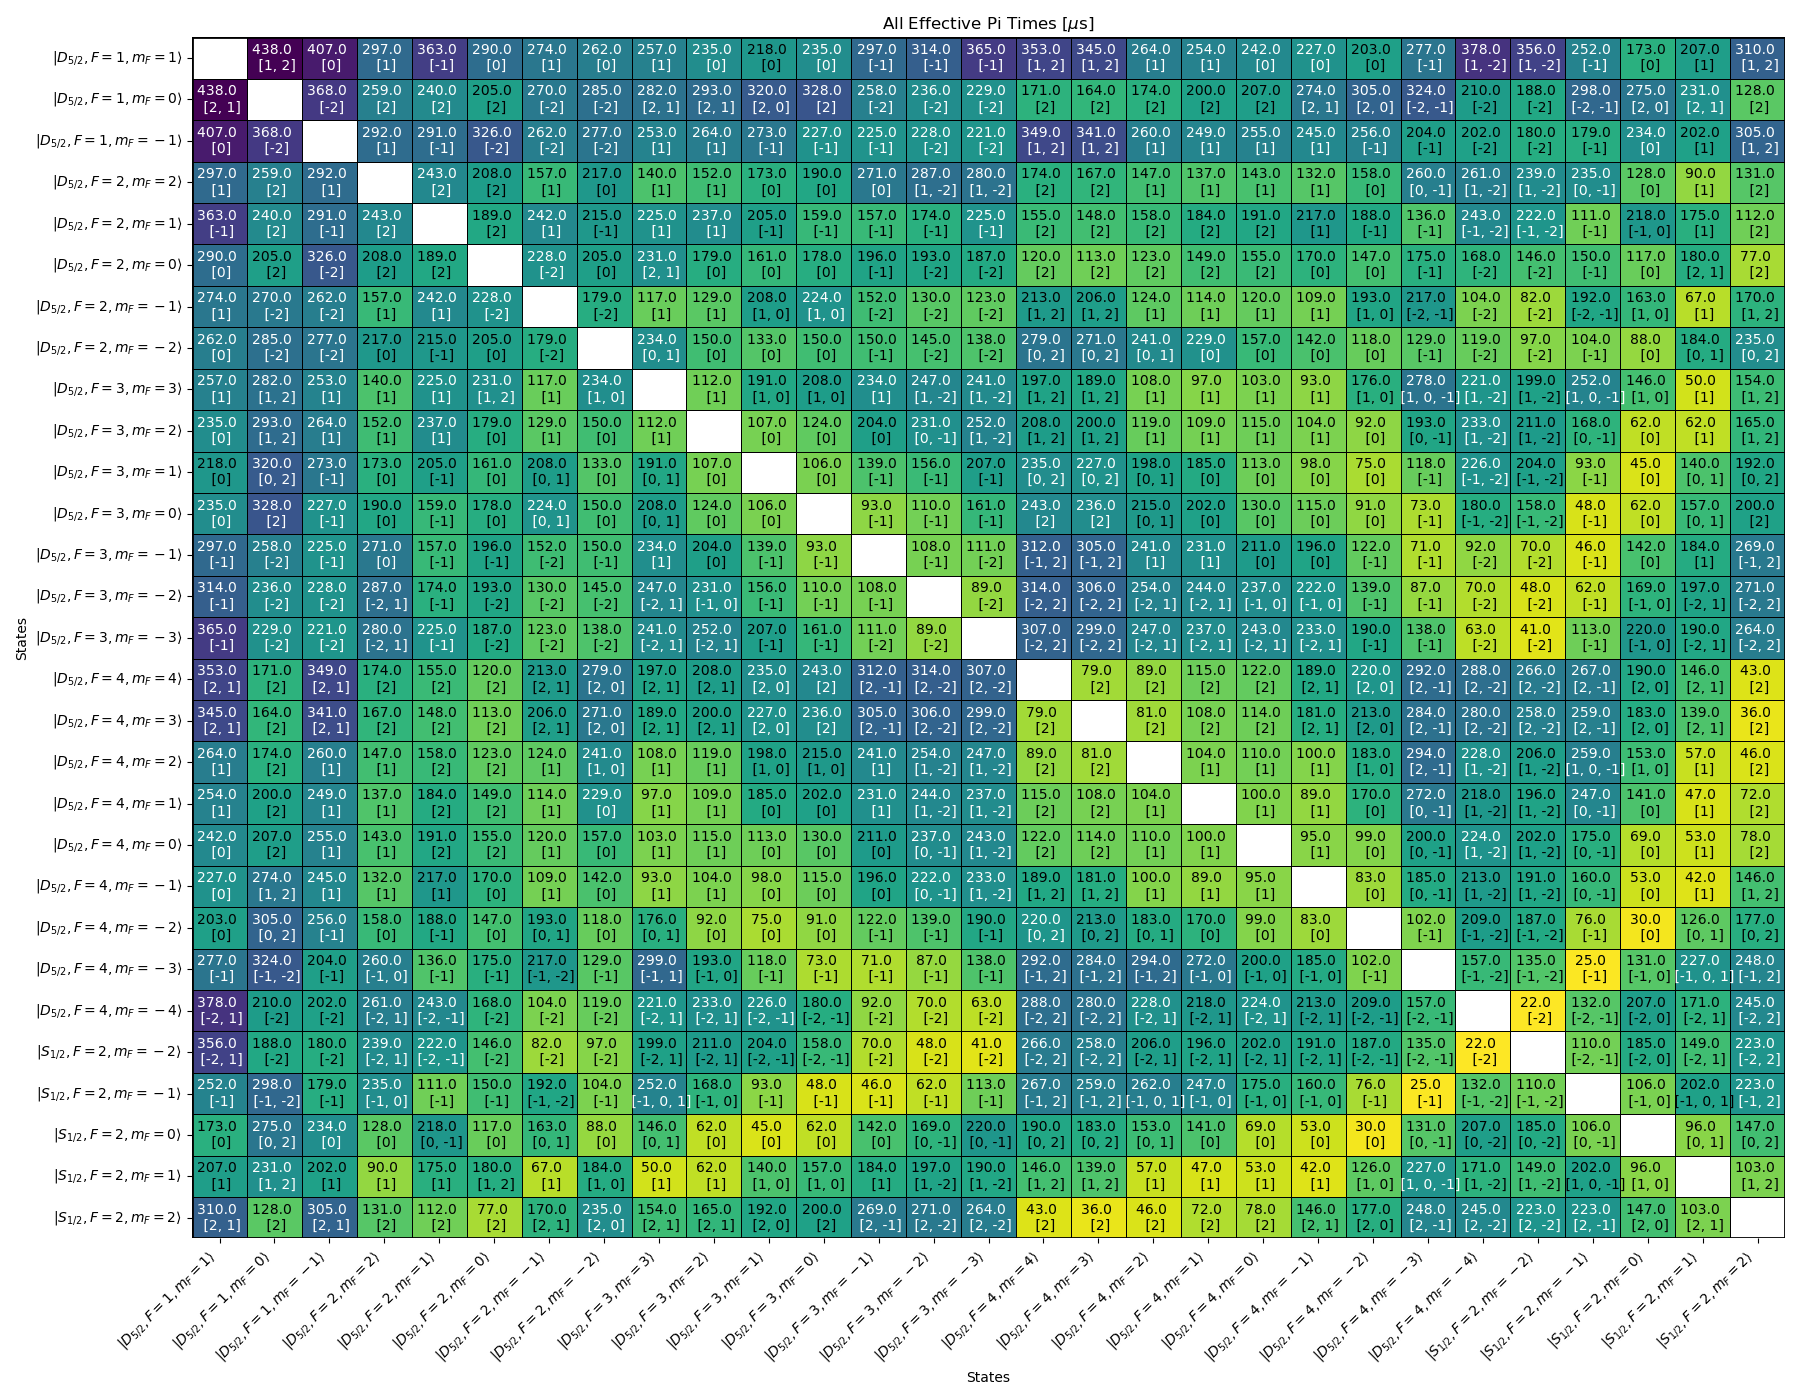

In [1687]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap

# Load the .mat file (replace with your actual filename)
mat = scipy.io.loadmat('Full_sensitivity_matrix_with_lables.mat')

# Display the available keys in the .mat file
print("Available variables in the .mat file:")
print(mat.keys())

# Extract the matrix and labels from the .mat file
np.fill_diagonal(pi_times_array, np.nan)
matrix = pi_times_array
x_labels = [str(f'${label[0][0]}$') for label in mat['list_of_lables']]
y_labels = [str(f'${label[0][0]}$') for label in mat['list_of_lables']]

# Verify the shape of the matrix
if matrix.shape == (29, 29):
    print("Successfully loaded a 29x29 matrix.")
else:
    print(f"Matrix shape is {matrix.shape}, not 29x29.")

# Create a heatmap using seaborn with the 'rainbow' colormap
plt.figure(figsize=(18, 14))  # Adjust figure size for better fit
ax = sns.heatmap(matrix, annot=False, fmt='.2f', cmap='viridis_r',
                 xticklabels=x_labels, yticklabels=y_labels, cbar=False, 
                 linewidths=0.5, linecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('States')
plt.ylabel('States')
plt.title('All Effective Pi Times [$\mu$s]')

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        value = matrix[i, j] / matrix.max()  # Normalize the value to [0, 1] range
        ax.text(j + 0.5, i + 0.5, f'{np.round(matrix[i, j])} \n {list(S12_nodes_array[i,j])}', 
                ha='center', va='center', color='white' if matrix[i, j]> 220 or np.isnan(matrix[i, j]) else 'black', fontsize=10)

ax.add_patch(Rectangle((0, 0), matrix.shape[1], matrix.shape[0], 
                       fill=False, edgecolor='black', linewidth=2))

# Adjust layout to fit everything neatly
plt.tight_layout()

plt.savefig('All_effective_pi_times.pdf', dpi = 800)
plt.show()


In [43]:
%matplotlib widget

In [1689]:
def get_element(transitions,matrix = pi_times_array):
    pi_times_list = []
    for transition in transitions:
        row_label = [transition[1],transition[2]]
        Fs = [1,2,3,4]
        states = []
        col_labels = [-2,-1,0,1,2]
        for i in Fs:
            for j in range(2*i+1):
                mF = i-j
                states.append([i,mF])
    
        row_labels = states
        all_labels = row_labels + col_labels
        col_label = transition[0]
    
        # Find the index of the row label
        row_index = all_labels.index(row_label)
        # Find the index of the column label
        col_index = all_labels.index(col_label)
        print(row_index,col_index)
        if row_index is not None and col_index in range(len(all_labels)):
            pi_times_list.append(matrix[row_index, col_index])
        else:
            pi_times_list.append(np.nan)

    return pi_times_list

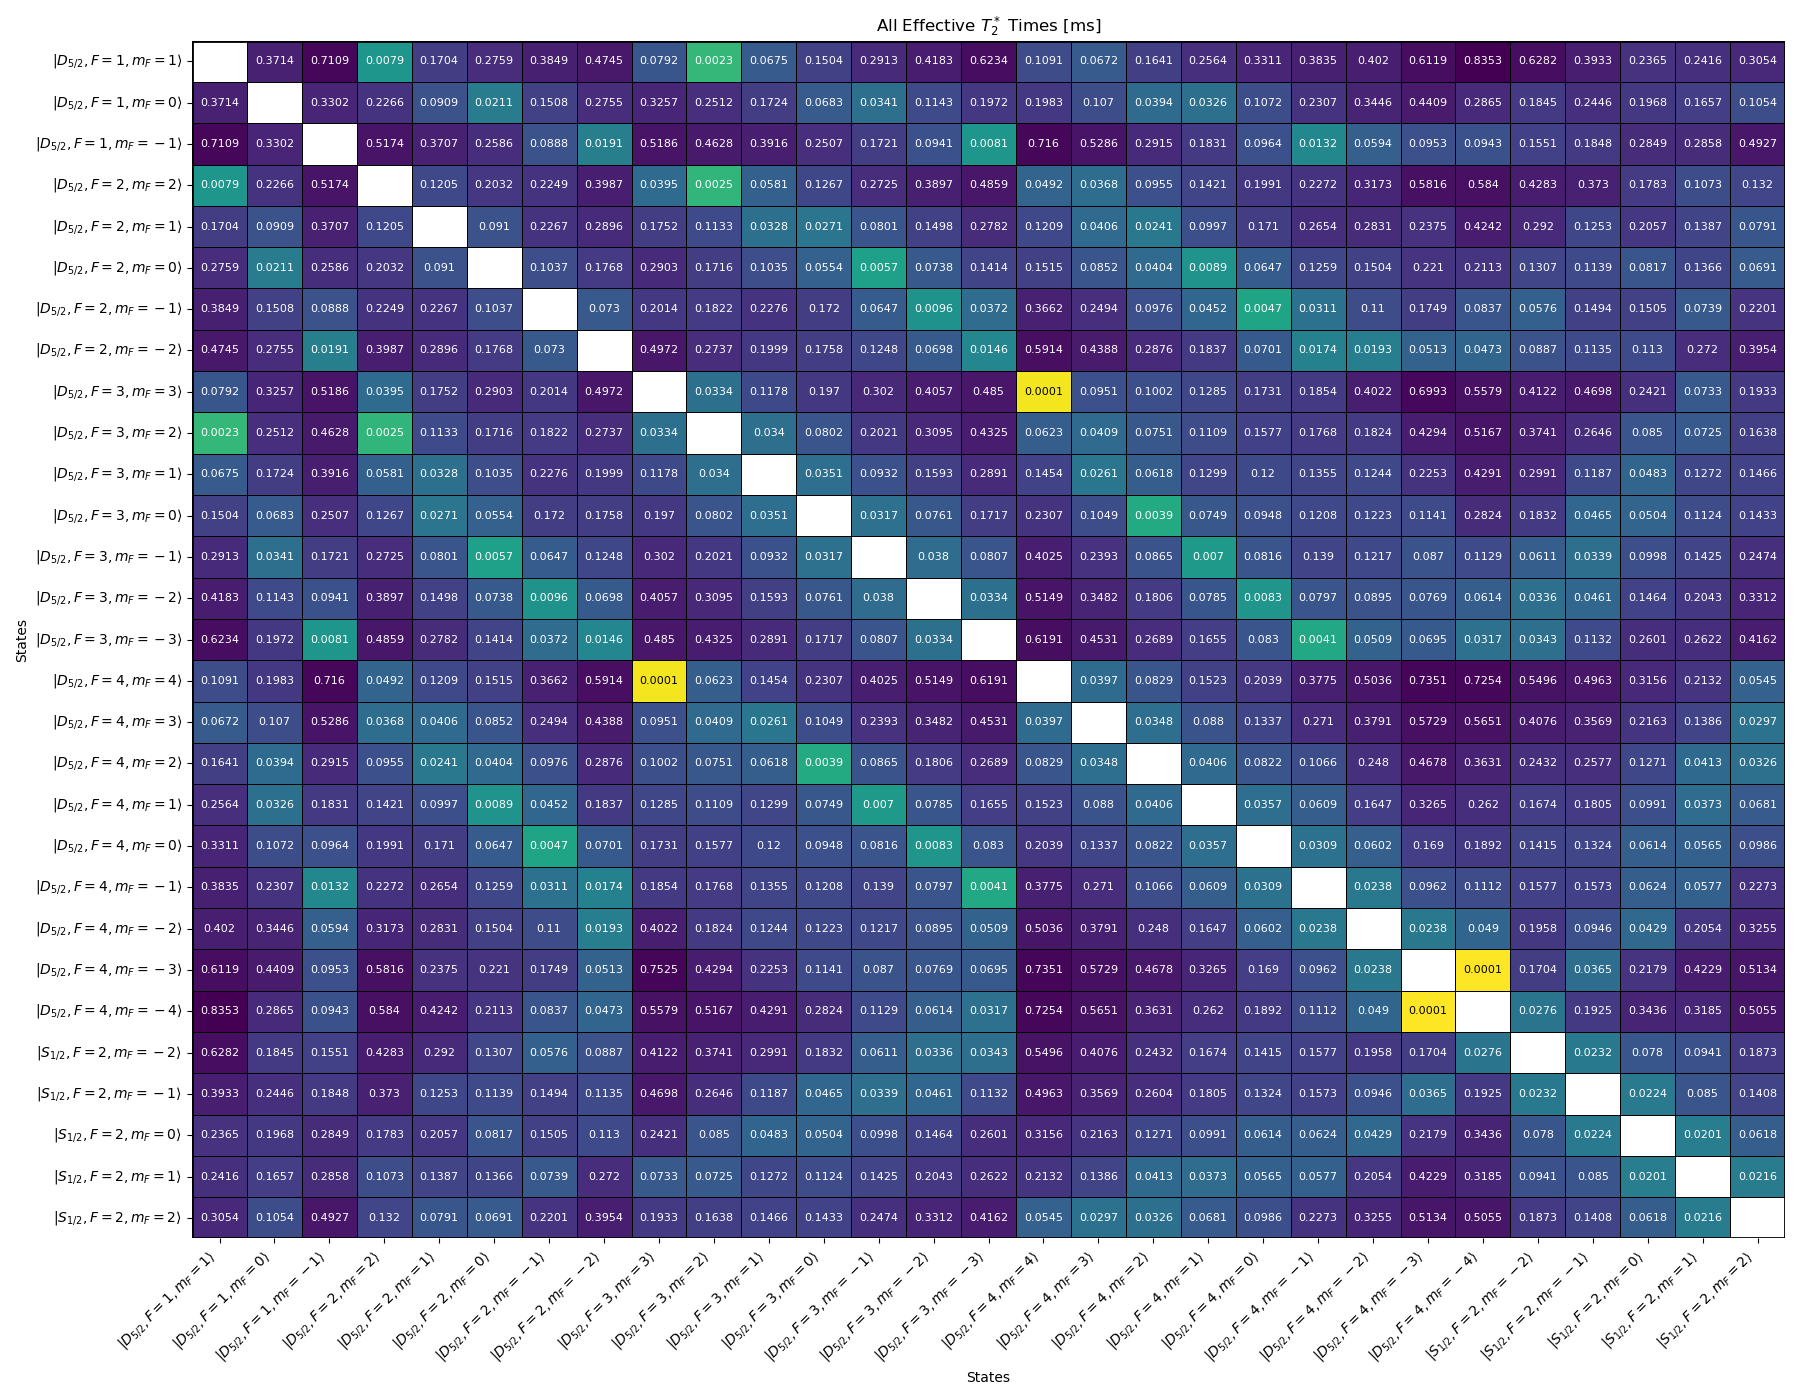

In [1781]:
mat = scipy.io.loadmat('Full_sensitivity_matrix_with_lables.mat')
Sen_matrix = mat['Sen_matrix']
x_labels = [str(f'${label[0][0]}$') for label in mat['list_of_lables']]
y_labels = [str(f'${label[0][0]}$') for label in mat['list_of_lables']]

B_N = 0.0003
L_N = 0.0007

L_N_matrix = np.full((29, 29), L_N)

L_N_matrix[0:24, 0:24] = 0  # Adjust the slicing as needed
L_N_matrix[-5:, -5:] = 0  # Adjust the slicing as needed

T2_matrix =(-L_N_matrix + np.sqrt(L_N_matrix**2 + 4*(np.abs(Sen_matrix)*B_N)**2))/(2*(np.abs(Sen_matrix)*B_N)**2)
# T2_matrix = 1/(L_N + np.abs(Sen_matrix)*B_N)
pi_T2_times = pi_times_array/T2_matrix
effctive_sen_matrix = 1/T2_matrix
matrix = effctive_sen_matrix*pi_times_array

plt.figure(figsize=(18, 14))  # Adjust figure size for better fit
ax = sns.heatmap(np.log(matrix), annot=False, fmt='.2f', cmap='viridis_r',
                 xticklabels=x_labels, yticklabels=y_labels, cbar=False, 
                 linewidths=0.5, linecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('States')
plt.ylabel('States')
plt.title('All Effective $T_2^*$ Times [ms]')

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        value = matrix[i, j] / matrix.max()  # Normalize the value to [0, 1] range
        ax.text(j + 0.5, i + 0.5, f'{np.round(matrix[i, j],4)}', 
                ha='center', va='center', color='white' if matrix[i, j] > 0.001  or np.isnan(matrix[i, j]) else 'black', fontsize=8)

ax.add_patch(Rectangle((0, 0), matrix.shape[1], matrix.shape[0], 
                       fill=False, edgecolor='black', linewidth=2))

# Adjust layout to fit everything neatly
plt.tight_layout()

# plt.savefig('All_effective_T2_times.pdf', dpi = 800)
plt.show()

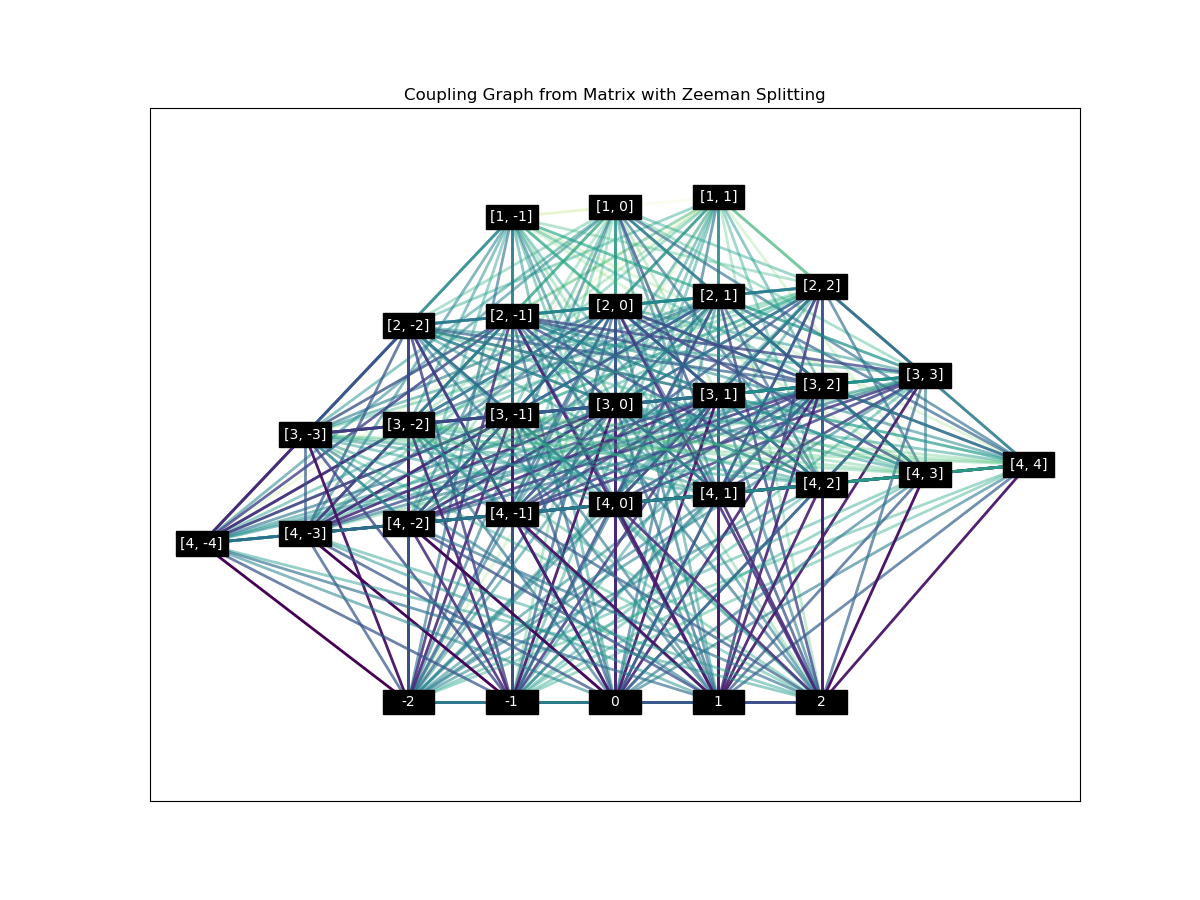

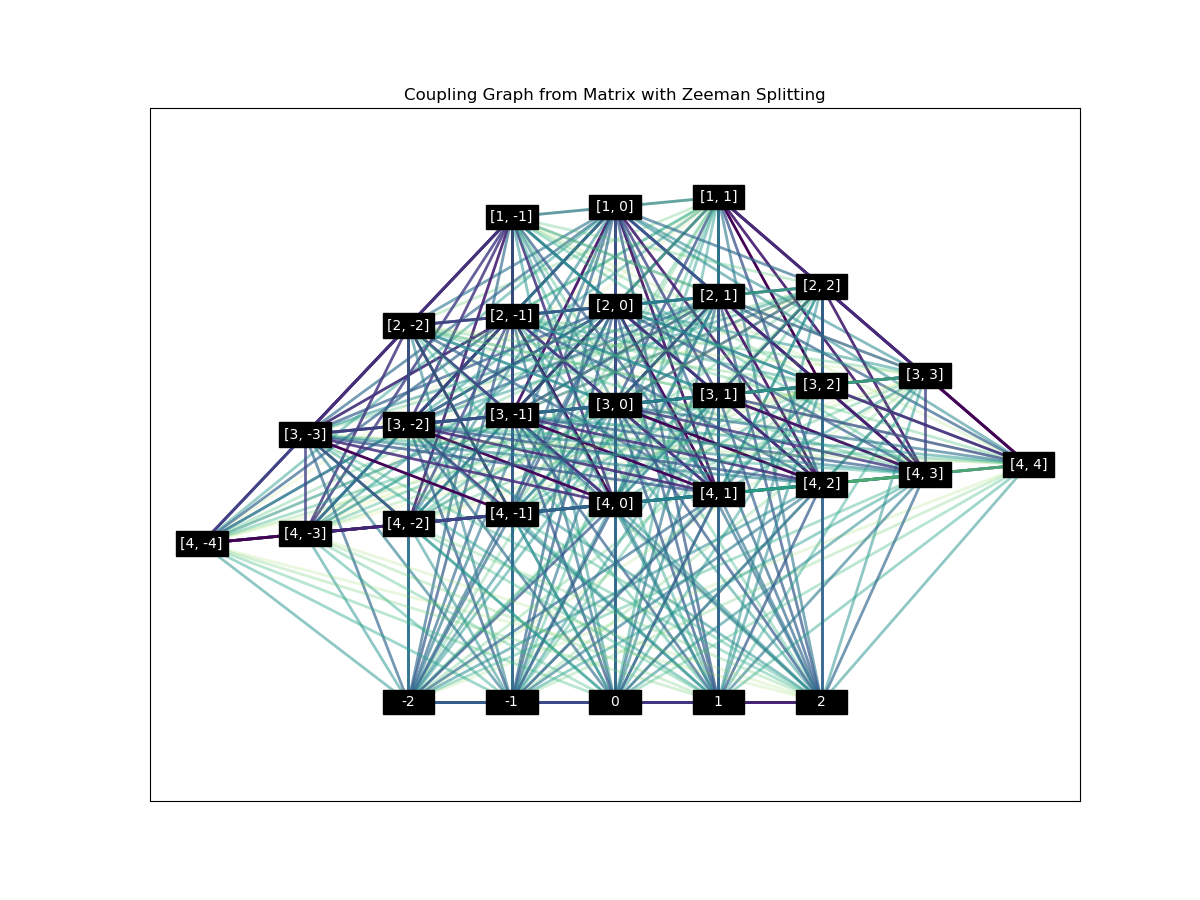

In [1760]:
G_pi_times = plot_coupling_graph_from_matrix(pi_times_array, pi_times_array)
G_sensitivities = plot_coupling_graph_from_matrix(effctive_sen_matrix, effctive_sen_matrix)

In [1854]:
import networkx as nx
from itertools import combinations
import numpy as np

def compute_total_edge_weight(G, nodes_set):
    # Create a subgraph induced by the selected nodes
    subG = G.subgraph(nodes_set)
    # Sum the weights of all edges in the subgraph
    total_weight = sum(data.get('weight', 1) for u, v, data in subG.edges(data=True))
    return total_weight

def find_optimal_nodes(G_pi_times, G_sensitivities, d):
    nodes = list(G_pi_times.nodes())
    min_cost = float('inf')
    best_combination = None

    # Total number of combinations
    total_combinations = len(list(combinations(nodes, d)))
    print(f"Total combinations to evaluate: {total_combinations}")

    for idx, nodes_set in enumerate(combinations(nodes, d)):
        # print(nodes_set)
        sum_pi = compute_total_edge_weight(G_pi_times, nodes_set)
        sum_sen = compute_total_edge_weight(G_sensitivities, nodes_set)
        cost = sum_pi * sum_sen

        if cost < min_cost:
            min_cost = cost
            best_combination = nodes_set

        # Optional: Print progress every 1000 iterations
        if idx % 1000 == 0 and idx > 0:
            print(f"Evaluated {idx} combinations so far...")

    print(f"\nBest combination of nodes: {best_combination}")
    print(f"Minimum cost: {min_cost}")

    return best_combination, min_cost

# def find_optimal_nodes_greedy(G_pi_times, G_sensitivities, d):
#     nodes = list(G_pi_times.nodes())
#     selected_nodes = set()
#     remaining_nodes = set(nodes)
#     min_cost = float('inf')

#     for _ in range(d):
#         best_node = None
#         best_cost = float('inf')
#         for node in remaining_nodes:
#             temp_selected = selected_nodes.union({node})
#             cost = cost_function(G_pi_times, G_sensitivities, temp_selected)
#             if cost < best_cost:
#                 best_cost = cost
#                 best_node = node
#         if best_node is not None:
#             selected_nodes.add(best_node)
#             remaining_nodes.remove(best_node)
#             min_cost = best_cost
#         else:
#             break  # No improvement possible

#     print(f"\nSelected nodes using greedy approach: {selected_nodes}")
#     print(f"Minimum cost: {min_cost}")

#     return selected_nodes, min_cost


# d = 3
# best_nodes, min_cost = find_optimal_nodes_greedy(G_pi_times, G_sensitivities, d)


d = 6
best_nodes, min_cost = find_optimal_nodes(G_pi_times, G_sensitivities, d)

Total combinations to evaluate: 475020
Evaluated 1000 combinations so far...
Evaluated 2000 combinations so far...
Evaluated 3000 combinations so far...
Evaluated 4000 combinations so far...
Evaluated 5000 combinations so far...
Evaluated 6000 combinations so far...
Evaluated 7000 combinations so far...
Evaluated 8000 combinations so far...
Evaluated 9000 combinations so far...
Evaluated 10000 combinations so far...
Evaluated 11000 combinations so far...
Evaluated 12000 combinations so far...
Evaluated 13000 combinations so far...
Evaluated 14000 combinations so far...
Evaluated 15000 combinations so far...
Evaluated 16000 combinations so far...
Evaluated 17000 combinations so far...
Evaluated 18000 combinations so far...
Evaluated 19000 combinations so far...
Evaluated 20000 combinations so far...
Evaluated 21000 combinations so far...
Evaluated 22000 combinations so far...
Evaluated 23000 combinations so far...
Evaluated 24000 combinations so far...
Evaluated 25000 combinations so fa

In [1904]:
import networkx as nx
import numpy as np
import random

def compute_total_edge_weight(G, nodes_set):
    # Create a subgraph induced by the selected nodes
    subG = G.subgraph(nodes_set)
    # Sum the weights of all edges in the subgraph
    total_weight = sum(
        data.get('weight', 1) for _, _, data in subG.edges(data=True)
    )
    return total_weight

def cost_function(G_pi_times, G_sensitivities, nodes_set):
    sum_pi = compute_total_edge_weight(G_pi_times, nodes_set)
    sum_sen = compute_total_edge_weight(G_sensitivities, nodes_set)
    return sum_pi * sum_sen

def simulated_annealing(G_pi_times, G_sensitivities, d, max_iter=50000, initial_temp=10000, cooling_rate=0.001):
    nodes = list(G_pi_times.nodes())
    # Random initial solution
    current_solution = set(random.sample(nodes, d))
    current_cost = cost_function(G_pi_times, G_sensitivities, current_solution)
    best_solution = current_solution.copy()
    best_cost = current_cost
    temperature = initial_temp

    for iteration in range(max_iter):
        # Generate neighboring solution
        non_selected_nodes = list(set(nodes) - current_solution)
        if not non_selected_nodes:
            break
        node_to_remove = random.choice(tuple(current_solution))
        node_to_add = random.choice(non_selected_nodes)
        new_solution = current_solution.copy()
        new_solution.remove(node_to_remove)
        new_solution.add(node_to_add)
        new_cost = cost_function(G_pi_times, G_sensitivities, new_solution)

        # Acceptance probability
        delta_cost = new_cost - current_cost
        if delta_cost < 0 or random.uniform(0, 1) < np.exp(-delta_cost / temperature):
            current_solution = new_solution
            current_cost = new_cost
            # Update best solution
            if current_cost < best_cost:
                best_solution = current_solution.copy()
                best_cost = current_cost

        # Cool down
        temperature *= (1 - cooling_rate)

        # Optional: Print progress every 1000 iterations
        if iteration % 1000 == 0 and iteration > 0:
            print(f"Iteration {iteration}, Current Cost: {current_cost}, Best Cost: {best_cost}")

        # Terminate if temperature is very low
        if temperature < 1e-8:
            break

    print(f"\nBest combination of nodes found: {best_solution}")
    print(f"Minimum cost: {best_cost}")

    return best_solution, best_cost

def compute_node_sensitivities(G_sensitivities, nodes_set):
    node_sensitivities = {}
    # Create a subgraph induced by the selected nodes
    subG = G_sensitivities.subgraph(nodes_set)
    for node in nodes_set:
        # Sum the weights of all edges connected to the node within the subgraph
        total_sensitivity = sum(
            data.get('weight', 1) for _, _, data in subG.edges(node, data=True)
        )
        node_sensitivities[node] = total_sensitivity
    return node_sensitivities

# Example usage:
# Assuming you have G_pi_times and G_sensitivities already created
# Set the value of d
d = 12
best_nodes, min_cost = simulated_annealing(G_pi_times, G_sensitivities, d)

# Compute sensitivities for the selected nodes, considering only edges between them
node_sensitivities = compute_node_sensitivities(G_sensitivities, best_nodes)

ordered_nodes = sorted(node_sensitivities.items(), key=lambda item: item[1])

print("\nSelected nodes ordered by ascending sensitivity:")
for node, sensitivity in ordered_nodes:
    print(f"Node: {node}, Total Sensitivity: {sensitivity}")


Iteration 1000, Current Cost: 923.566632347476, Best Cost: 529.4321431499022
Iteration 2000, Current Cost: 932.3499081301089, Best Cost: 529.4321431499022
Iteration 3000, Current Cost: 954.3278619897221, Best Cost: 492.16343390599354
Iteration 4000, Current Cost: 805.1681121999783, Best Cost: 466.73730852442094
Iteration 5000, Current Cost: 692.9417138150493, Best Cost: 454.34861183664765
Iteration 6000, Current Cost: 501.6258523719033, Best Cost: 379.78941547761855
Iteration 7000, Current Cost: 358.05831517498814, Best Cost: 358.05831517498814
Iteration 8000, Current Cost: 355.7189188288632, Best Cost: 355.7189188288632
Iteration 9000, Current Cost: 355.7189188288632, Best Cost: 355.7189188288632
Iteration 10000, Current Cost: 355.7189188288632, Best Cost: 355.7189188288632
Iteration 11000, Current Cost: 355.7189188288632, Best Cost: 355.7189188288632
Iteration 12000, Current Cost: 355.7189188288632, Best Cost: 355.7189188288632
Iteration 13000, Current Cost: 355.7189188288632, Best C

In [1910]:
best_nodes_ordered_list = []
min_cost_list = []
for d in range(3,25):
    best_nodes, min_cost = simulated_annealing(G_pi_times, G_sensitivities, d)
    node_sensitivities = compute_node_sensitivities(G_sensitivities, best_nodes)
    ordered_nodes = sorted(node_sensitivities.items(), key=lambda item: item[1])
    best_nodes_ordered_list.append(ordered_nodes)
    min_cost_list.append(min_cost)

Iteration 1000, Current Cost: 3.13354400092878, Best Cost: 0.1259514657247314
Iteration 2000, Current Cost: 2.5694985740113383, Best Cost: 0.07556391037561809
Iteration 3000, Current Cost: 1.5257716377286332, Best Cost: 0.06881220830044835
Iteration 4000, Current Cost: 2.475949269386333, Best Cost: 0.06881220830044835
Iteration 5000, Current Cost: 2.600818752301493, Best Cost: 0.036249561640549315
Iteration 6000, Current Cost: 2.460329610426493, Best Cost: 0.036249561640549315
Iteration 7000, Current Cost: 1.1137799287302894, Best Cost: 0.036249561640549315
Iteration 8000, Current Cost: 1.643508873096817, Best Cost: 0.036249561640549315
Iteration 9000, Current Cost: 0.7994906063386544, Best Cost: 0.036249561640549315
Iteration 10000, Current Cost: 0.5585151822606358, Best Cost: 0.036249561640549315
Iteration 11000, Current Cost: 0.33684758777880863, Best Cost: 0.036249561640549315
Iteration 12000, Current Cost: 0.16309170231453055, Best Cost: 0.036249561640549315
Iteration 13000, Curre

[6 24 120 720 5040 40320 362880 3628800 39916800 479001600 6227020800
 87178291200 1307674368000 20922789888000 355687428096000 6402373705728000
 121645100408832000 2432902008176640000 51090942171709440000
 1124000727777607680000 25852016738884976640000 620448401733239439360000]


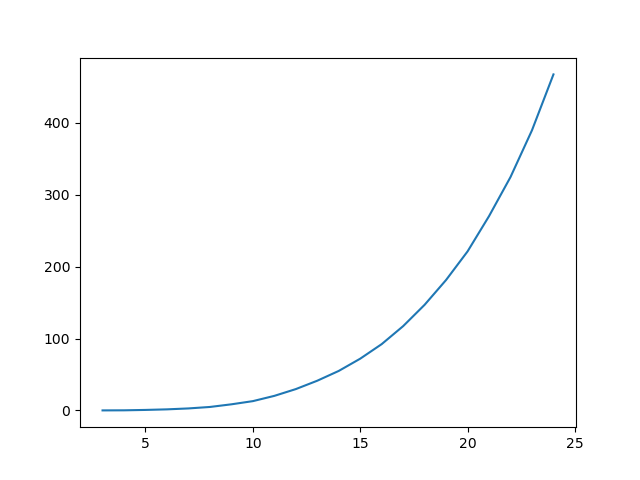

In [2026]:
import math

# Define the list of numbers
numbers = range(3,25)

# Calculate the factorial for each element in the list
factorials = np.array([math.factorial(num) for num in numbers])

print(factorials)

plt.figure()
plt.plot(range(3,25),min_cost_list/np.array(range(3,25)))
# plt.yscale("log")
plt.show()

In [2008]:
best_kets_for_d = []
for i in best_nodes_ordered_list:
    best_kets = []
    print('change')
    for j,k in i :
        print(j,k)
        best_kets.append(j)
    best_kets_for_d.append(best_kets)

change
[3, 2] 2.651820386745385e-05
[1, 1] 3.6224933410267106e-05
[2, 2] 4.332967819209443e-05
change
[3, -3] 0.00015952111380101994
[1, -1] 0.00015952111380101996
[4, -1] 0.0001946339730238833
[2, -2] 0.000297201824196236
change
[3, -3] 0.0004616516143869376
[4, -1] 0.00047920804399836925
[1, -1] 0.0004982137788829277
[2, -2] 0.0007047348444757516
[2, -1] 0.001332930256921827
change
[4, -1] 0.0011076263231188932
[2, -1] 0.0011076263231188932
[3, -3] 0.0011427391823417563
[4, 0] 0.0011861401476380706
[3, -2] 0.0013256397746772561
[2, -2] 0.001564349261116149
change
[4, -1] 0.001161744917226315
[3, -3] 0.0011793013468377465
[1, -1] 0.0012889878403257171
[2, -1] 0.001446318988200801
[4, 0] 0.001564089724979567
[2, -2] 0.001633189616313757
[3, -2] 0.001738464258778549
change
[3, -3] 0.001447882760203356
[4, -1] 0.0014478827602033562
[1, -1] 0.0015210070891953364
[2, -2] 0.0017963685099857683
[2, -1] 0.002017030902152328
[4, 0] 0.002174058551190683
[3, -2] 0.002383307991749461
[4, -2] 0.00

In [2219]:
d = 4
for d in range(3,25):
    D_kets = best_kets_for_d[d-3]
    ket_0 = D_kets[0]
    other_kets = D_kets[1:]
    
    start_node = ket_0
    paths = []
    for i in other_kets:
        end_node = str(i)
        shortest_paths_with_weights = find_shortest_paths_with_min_weight(start_node, end_node,matrix = transition_strengths, weight_matrix = pi_times)
        fastest_path = min(shortest_paths_with_weights, key=lambda x: x[2])
        path = [ast.literal_eval(item) for item in fastest_path[0]]
        # print(fastest_path)
        paths.append(path)
    
    
    col_labels = [-2,-1,0,1,2]
    row_labels = []
    for i in Fs:
        for j in range(2*i+1):
            mF = i-j
            row_labels.append([i,mF])
    all_labels = row_labels + col_labels
    def min_average_and_column_indices(matrix):
    
        sorted_indices = np.argsort(matrix, axis=1)
    
        return sorted_indices
    
    
    sorted_indices = min_average_and_column_indices(pi_times_array[:,:])
    probe_trans_dict = {}  # Initialize the dictionary if not done already
    
    for j, label in enumerate(all_labels):
        if isinstance(label, list):
            label = label
        probe_trans_dict[str(label)] = [all_labels[i] for i in sorted_indices[j]]
    # print(probe_trans_dict)
    # print(probe_trans_dict['(2, 2)'])
    
    probe_trans_list = []
    for p in D_kets:
        # print(p)
        # print(probe_trans_dict[p][1])
        best_S12 = probe_trans_dict[p][1]
        # print(best_S12)
        if [best_S12,ast.literal_eval(p)[0],ast.literal_eval(p)[1]] not in probe_trans_list:
            probe_trans_list.append([best_S12,ast.literal_eval(p)[0],ast.literal_eval(p)[1]])
    
    # print(probe_trans_list)
    
    def get_trans(path):
        trans = []
        for i in range(len(path)-1):
            if isinstance(path[i], int):
                l = deque(path[i+1])
                l.appendleft(path[i])
                trans.append(list(l))
            if isinstance(path[i],list):
                l = deque(path[i])
                l.appendleft(path[i+1])
                trans.append(list(l))
        return trans
    all_trans = []
    for i in paths:
        all_trans.append(get_trans(i))
    # print(all_trans)
    
    def assign_states(transitions):
        unique_states = {}
        state_counter = 0
    
        for path in transitions:
            for transition in path:
                from_state = (transition[0],)
                to_state = tuple(transition[1:])
                if from_state not in unique_states:
                    unique_states[from_state] = state_counter
                    state_counter += 1
                if to_state not in unique_states:
                    unique_states[to_state] = state_counter
                    state_counter += 1
    
        return unique_states
    
    def translate_transitions(transitions, unique_states):
        translated_paths = []
        all_couplings = []
    
        for path in transitions:
            translated_path = []
            for transition in path:
                from_state = (transition[0],)
                to_state = tuple(transition[1:])
                translated_from = unique_states[from_state]
                translated_to = unique_states[to_state]
                translated_path.append((translated_from, translated_to))
                all_couplings.append((translated_from, translated_to))
            translated_paths.append(translated_path)
    
        return translated_paths, all_couplings
    
    def wrap_couplings(couplings):
        wrapped_couplings = []
        state_one_couplings = []
        other_couplings = []
    
        for coupling in couplings:
            if 1 in coupling:
                state_one_couplings.append(coupling)
            else:
                other_couplings.append(coupling)
        wrapped_couplings.extend(other_couplings[::-1])
    
        # if state_one_couplings:
        #     first_coupling = state_one_couplings.pop(0)
        #     wrapped_couplings.append((first_coupling[1], first_coupling[0]))  # Reverse first coupling
    
        wrapped_couplings.extend(state_one_couplings)
        wrapped_couplings.extend(other_couplings)
    
        return wrapped_couplings
    
    # print(wrap_couplings([(0,1),(0,2)]))
    
    transitions = all_trans
    
    unique_states = assign_states(transitions)
    translated_paths, all_couplings = translate_transitions(transitions, unique_states)
    
    # Generate U1 and U2
    U1 = all_couplings
    U2 = []
    
    # Print unique states and their assigned numbers
    # print("Unique States and Assigned Numbers:")
    # for state, number in unique_states.items():
    #     print(f"State: {state}, Number: {number}")
    
    # Print translated paths
    # print("\nTranslated Paths:")
    for path in translated_paths:
        U2.extend(wrap_couplings(path))
        # print(path)
    
    # Print U1 and U2
    # print("\nU1 (Original Couplings):")
    # print(U1)
    
    # print("\nU2 (Wrapped Couplings):")
    U2.reverse()
    # print(U2)
    
    trans_mask_U1 = []
    trans_mask_U2 = []
    phase_mask_U2 = []
    num_U1 = 1
    
    comb_U = zip(U1,U2)
    for i in U1:
        n1_U1=i[0]
        n2_U1=i[1]
        if n1_U1 ==1 or n2_U1 ==1:
            trans_mask_U1.append(num_U1)
    
            num_U1 = num_U1 +1
        else:
            trans_mask_U1.append(0)
    
    num_U2 = max(trans_mask_U1)
    phase_num =1
    for j in U2:
        n1_U2=j[0]
        n2_U2=j[1]
        if n1_U2 ==1 or n2_U2 ==1:
            trans_mask_U2.append(num_U2)
            phase_mask_U2.append(phase_num)
            num_U2 = num_U2 - 1
            phase_num = phase_num + 1
        else:
            trans_mask_U2.append(0)
            phase_mask_U2.append(0)
    
    # print('stimulated_phase_mask U1: ', list(0*np.array(trans_mask_U1)))
    
    # print('stimulated_phase_mask U2: ',trans_mask_U2)
    # print(phase_mask_U2)
    # print(len(trans_mask_U1)+len(trans_mask_U2))
    
    def translate_back(couplings, unique_states):
    # Invert the unique_states dictionary to map numbers back to states
        number_to_state = {v: k for k, v in unique_states.items()}
        
        # Translate each coupling back to the original states
        original_couplings = []
        for from_state, to_state in couplings:
            original_from = number_to_state[from_state]
            original_to = number_to_state[to_state]
            original_couplings.append((original_from[0], original_to))
        
        return original_couplings
    
    
    
    original_U1 = translate_back(U1, unique_states)
    original_U2 = translate_back(U2, unique_states)
    
    list_u1_trans = []
    list_u2_trans = []
    
    # Print the original state couplings
    # print("\nOriginal U1:")
    for from_state, to_state in original_U1:
        list_u1_trans.extend([[from_state,to_state[0],to_state[1]]])
        # print(f"({from_state}, {to_state})")
    # print(list_u1_trans)
    # print("\nOriginal U2:")
    for from_state, to_state in original_U2:
        list_u2_trans.extend([[from_state,to_state[0],to_state[1]]])
        # print(f"({from_state}, {to_state})")
    # print(list_u2_trans)
    
    U1_times = get_pi_times(list_u1_trans)
    # print(U1_times)
    U2_times= get_pi_times(list_u2_trans)
    total_time = U1_times + U2_times
    # print(sum(U1_times))
    # print(sum(U2_times))
    corrected_times_U1 = [] 
    fractions_U1 = [] 
    for i,coup in enumerate(U1):
        n_ = trans_mask_U1[i]
        Rabi_frequencies = np.pi/U1_times[i]
        n1 = coup[0]
        n2 = coup[1]
        if n1 == 1 or n2 == 1:
            time = 2*np.arccos(np.sqrt(((d-n_)/ (d + 1 - n_))))*U1_times[i]/np.pi
            fractions_U1.append(1 - (d-n_)/ (d + 1 - n_))
        else:
            time  = 2*np.arcsin(1)*U1_times[i]/np.pi
            fractions_U1.append(1)
        corrected_times_U1.append(time)
    
    # print('Fractions U1: ', fractions_U1)
    
    # print(corrected_times_U1)
    
    corrected_times_U2 = [] 
    fractions_U2 = []
    for i,coup in enumerate(U2):
        n_ = trans_mask_U2[i]
        Rabi_frequencies = np.pi/U2_times[i]
        n1 = coup[0]
        n2 = coup[1]
        if n1 == 1 or n2 == 1:
            time = 2*np.arccos(np.sqrt(((d-n_)/ (d + 1 - n_))))/Rabi_frequencies
            fractions_U2.append(1-(d-n_)/ (d + 1 - n_))
        else:
            time  = 2*(np.arcsin(1)/Rabi_frequencies)
            fractions_U2.append(1)
        corrected_times_U2.append(time)
    # print('Fractions U2: ', fractions_U2)
    # print(corrected_times_U2)
    
    fixed_phase_mask_U1 = []
    sec_one = 0
    for i in fractions_U1:
        if i != 1:
            fixed_phase_mask_U1.append(1)
            sec_one = 0
        elif i == 1 and not sec_one:
            fixed_phase_mask_U1.append(0)
            sec_one = 1
        elif i==1 and sec_one:
            fixed_phase_mask_U1.append(1)
            sec_one = 0
    fixed_phase_mask_U2 = []
    sec_one = 0
    for i in fractions_U2:
        if i != 1:
            fixed_phase_mask_U2.append(0)
        elif i == 1 and not sec_one:
            fixed_phase_mask_U2.append(1)
            sec_one = 1
        elif i==1 and sec_one:
            fixed_phase_mask_U2.append(0)
            sec_one = 0
    
    # print(fixed_phase_mask_U1)
    # print(fixed_phase_mask_U2)
    print(
f'''
== D = {d} ==
<syntaxhighlight lang="python">
initial_state = {[list_u1_trans[0]]}

pulse_train_U1 = {list_u1_trans}
fractions_U1 = {fractions_U1}
simulated_phase_mask_U1 = {list(0*np.array(trans_mask_U1))}
fixed_phase_mask_U1 = {fixed_phase_mask_U1}

pulse_train_U2 = {list_u2_trans}
fractions_U2 = {fractions_U2}
simulated_phase_mask_U2 = {trans_mask_U2}
fixed_phase_mask_U2 = {fixed_phase_mask_U2}

full_pi_times_list = {total_time}
probe_trans = {probe_trans_list}
</syntaxhighlight>
'''
    
        
    )


== D = 3 ==
<syntaxhighlight lang="python">
initial_state = [[0, 3, 2]]

pulse_train_U1 = [[0, 3, 2], [0, 1, 1], [1, 3, 2], [1, 2, 2]]
fractions_U1 = [0.33333333333333337, 1, 0.5, 1]
simulated_phase_mask_U1 = [0, 0, 0, 0]
fixed_phase_mask_U1 = [1, 0, 1, 0]

pulse_train_U2 = [[1, 2, 2], [1, 3, 2], [1, 2, 2], [0, 1, 1], [0, 3, 2], [0, 1, 1]]
fractions_U2 = [1, 0.5, 1, 1, 0.33333333333333337, 1]
simulated_phase_mask_U2 = [0, 2, 0, 0, 1, 0]
fixed_phase_mask_U2 = [1, 0, 0, 1, 0, 0]

full_pi_times_list = [61.935288461538455, 173.46909090909094, 61.59328599096191, 89.92271442035816, 89.92271442035816, 61.59328599096191, 89.92271442035816, 173.46909090909094, 61.935288461538455, 173.46909090909094]
probe_trans = [[1, 3, 2], [0, 1, 1], [1, 2, 2]]
</syntaxhighlight>


== D = 4 ==
<syntaxhighlight lang="python">
initial_state = [[-2, 3, -3]]

pulse_train_U1 = [[-2, 3, -3], [-2, 1, -1], [-2, 3, -3], [-2, 2, -1], [1, 2, -1], [1, 4, -1], [-2, 3, -3], [-2, 2, -2]]
fractions_U1 = [0.25, 1, 0.33333333

TypeError: 'int' object is not subscriptable


initial_state = [[-2, 3, -3]]

pulse_train_U1 = [[-2, 3, -3], [-2, 1, -1], [-2, 3, -3], [-2, 2, -1], [1, 2, -1], [1, 4, -1], [-2, 3, -3], [-2, 2, -2]]
fractions_U1 = [0.25, 1, 0.33333333333333337, 1, 1, 1, 0.5, 1]
simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0]
fixed_phase_mask_U1 = [1, 0, 1, 0, 1, 0, 1, 0]

pulse_train_U2 = [[-2, 2, -2], [-2, 3, -3], [-2, 2, -2], [1, 4, -1], [1, 2, -1], [-2, 2, -1], [-2, 3, -3], [-2, 2, -1], [1, 2, -1], [1, 4, -1], [-2, 1, -1], [-2, 3, -3], [-2, 1, -1]]
fractions_U2 = [1, 0.5, 1, 1, 1, 1, 0.33333333333333337, 1, 1, 1, 1, 0.25, 1]
simulated_phase_mask_U2 = [0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0]
fixed_phase_mask_U2 = [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

full_pi_times_list = [41.031, 180.01509433962266, 41.031, 82.03611349957008, 67.08258504672897, 42.37211688311688, 41.031, 97.056, 97.056, 41.031, 97.056, 42.37211688311688, 67.08258504672897, 82.03611349957008, 41.031, 82.03611349957008, 67.08258504672897, 42.37211688311688, 180.01509433962266,

# Encoding $|0 \rangle$ in $6S_{1 \over 2}$ 

In [1985]:
def Min_average_sensitivity_average_pitime(d, S12_only = False, matrix_sen = np.abs(effctive_sen_matrix), matrix_pi = pi_times_array):
    col_labels = [-2,-1,0,1,2]
    row_labels = []
    Fs = [1,2,3,4]
    for i in Fs:
        for j in range(2*i+1):
            mF = i-j
            row_labels.append([i,mF])
    all_labels = row_labels + col_labels
    
    if S12_only:
        crop = -5
        print("cropped")
    else:
        print("not_cropped")
        crop = 0
    matrix_sen = matrix_sen[crop:,:-5]
    matrix_pi = matrix_pi[crop:,:-5]
    all_labels_cropped = all_labels[crop:]
    
    sorted_indices_sen = np.argsort(matrix_sen, axis=1)

    first_d_col_indices_sen = sorted_indices_sen[:, :d]

    first_d_elements_sen = np.take_along_axis(matrix_sen, first_d_col_indices_sen, axis=1)

    row_averages_sen = np.mean(first_d_elements_sen, axis=1)

    sorted_indices_pi = np.argsort(matrix_pi, axis=1)

    first_d_col_indices_pi = sorted_indices_pi[:, :d]

    first_d_elements_pi = np.take_along_axis(matrix_pi, first_d_col_indices_sen, axis=1)

    row_averages_pi = np.mean(first_d_elements_pi, axis=1)
    print(row_averages_pi, row_averages_sen)
    combined_row_averages = row_averages_pi * row_averages_sen
    print(combined_row_averages)
    min_avg = np.min(combined_row_averages)
    print(min_avg)
    min_avg_row_number = np.argmin(combined_row_averages)  
    print(min_avg_row_number)
    ket_0 =  str(all_labels_cropped[min_avg_row_number])
    
    min_avg_col_indices = first_d_col_indices_sen[min_avg_row_number]
    other_kets = [all_labels[i] for i in min_avg_col_indices]
    
    all_indices_sorted = sorted_indices_sen[min_avg_row_number]
    all_states = [all_labels[i] for i in all_indices]
    
    return min_avg, min_avg_row_number, min_avg_col_indices, ket_0, other_kets, all_states

In [1987]:
d = 8
# print(Min_average_sensitivity_average_pitime(d-1))
_,_,_,ket_0,other_kets,all_states = Min_average_sensitivity_average_pitime(d-1,S12_only = True)
print("start_node:", ket_0)
print("other_ket:", other_kets)
print('all_states: ',all_states)

cropped
[134.38425085 167.27357181 151.18055102 147.47118481 112.9339342 ] [0.00078248 0.00076085 0.00076244 0.00075241 0.00077888]
[0.10515359 0.12727093 0.11526662 0.11095889 0.08796184]
0.08796183704668664
4
start_node: 2
other_ket: [[2, 1], [4, 2], [3, 0], [3, 1], [1, 0], [4, 3], [2, 0]]
all_states:  [[4, 4], [3, 3], [2, 2], [3, 2], [4, 3], [3, 1], [2, 1], 2, [4, 2], [3, 0], 1, [2, 0], 0, [3, -1], [4, 1], -1, [3, -2], [4, 0], -2, [2, -1], [4, -1], [3, -3], [2, -2], [4, -2], [4, -3], [4, -4], [1, 0], [1, 1], [1, -1]]


In [1989]:
import numpy as np
col_labels = [-2,-1,0,1,2]
row_labels = []
for i in Fs:
    for j in range(2*i+1):
        mF = i-j
        row_labels.append([i,mF])
all_labels = row_labels + col_labels
def min_average_and_column_indices(matrix):

    sorted_indices = np.argsort(matrix, axis=1)

    return sorted_indices

# Example usage:
matrix = np.random.randint(0, 100, (29, 29))  # Create a 29x29 matrix with random integers
 # Example dimension

sorted_indices = min_average_and_column_indices(pi_times_array[:,:])
probe_trans_dict = {}  # Initialize the dictionary if not done already

for j, label in enumerate(all_labels):
    # Convert `label` to a tuple if it's a list
    if isinstance(label, list):
        label = tuple(label)
    probe_trans_dict[label] = [all_labels[i] for i in sorted_indices[j]]

print(probe_trans_dict[(2,2)])

[[2, 2], 1, 0, 2, [4, -1], [4, 1], [3, 3], [4, 0], [4, 2], [3, 2], [2, -1], [4, -2], [4, 3], [3, 1], [4, 4], [3, 0], [2, 0], [2, -2], -1, -2, [2, 1], [1, 0], [4, -3], [4, -4], [3, -1], [3, -3], [3, -2], [1, -1], [1, 1]]


In [1991]:
# import numpy as np
# col_labels = [-2,-1,0,1,2]
# row_labels = []
# for i in Fs:
#     for j in range(2*i+1):
#         mF = i-j
#         row_labels.append([i,mF])
# all_labels = row_labels + col_labels
# def min_average_and_column_indices(matrix, d):

#     sorted_indices = np.argsort(matrix, axis=1)

#     first_d_col_indices = sorted_indices[:, :d]

#     first_d_elements = np.take_along_axis(matrix, first_d_col_indices, axis=1)

#     row_averages = np.mean(first_d_elements, axis=1)

#     min_avg = np.min(row_averages)
#     min_avg_row_number = np.argmin(row_averages)  

#     min_avg_col_indices = first_d_col_indices[min_avg_row_number]

#     return min_avg, min_avg_row_number, min_avg_col_indices, sorted_indices[min_avg_row_number]

# # Example usage:
# matrix = np.random.randint(0, 100, (29, 29))  # Create a 29x29 matrix with random integers
# d =3  # Example dimension

# crop = -5

# min_avg, min_avg_row_number, min_avg_col_indices, all_indices = min_average_and_column_indices(pi_T2_times[crop:,:-5], d-1)
# print(min_avg, min_avg_row_number, min_avg_col_indices, all_indices)
# ket_0 =  str(all_labels[crop:][min_avg_row_number])
# other_kets = [all_labels[i] for i in min_avg_col_indices]
# all_states = [all_labels[i] for i in all_indices]
# print("Minimum average of the first", d, "elements:", min_avg)
# print("start_node:", ket_0)
# print("other_ket:", other_kets)
# print('all_states: ',all_states)

    


In [1993]:
start_node = ket_0
paths = []
for i in other_kets:
    end_node = str(i)
    shortest_paths_with_weights = find_shortest_paths_with_min_weight(start_node, end_node,matrix = transition_strengths, weight_matrix = pi_times)
    fastest_path = min(shortest_paths_with_weights, key=lambda x: x[2])
    path = [ast.literal_eval(item) for item in fastest_path[0]]
    print(fastest_path)
    paths.append(path)


    
    
# used_as_bus = []
# for j in other_kets:
#     for path in paths:    
#         if j in path[1:-2]:
#             if j not in used_as_bus:
#                 used_as_bus.append(j)
#                 print('state used as bus: ', j)

# filtered_paths = [
#     path for path in paths if path[-1] not in used_as_bus
# ]

# last_state_used = other_kets[-1]
# last_index_used = all_states.index(last_state_used)

# extra_states = all_states[last_index_used+1: last_index_used+1+len(used_as_bus)]
# print(extra_states)
# for i in extra_states:
#     end_node = str(i)
#     shortest_paths_with_weights = find_shortest_paths_with_min_weight(start_node, end_node,matrix = transition_strengths, weight_matrix = pi_times)
#     sorted_shortest_paths = sorted(shortest_paths_with_weights, key=lambda x: x[2])
#     # print(sorted_shortest_paths)
#     worked = 1
#     for dummy_ind in range(len(sorted_shortest_paths)):
#         print('trying:',sorted_shortest_paths[dummy_ind][0])
#         for j in other_kets:
#             ends = str(j)
#             # print(sorted_shortest_paths[dummy_ind][0][1:-2])
#             if ends  in sorted_shortest_paths[dummy_ind][0][1:-2]:
#                 worked = 0
#         if worked:
#             fastest_path = sorted_shortest_paths[dummy_ind]
#             path = [ast.literal_eval(item) for item in fastest_path[0]]
#             print(fastest_path)
#             filtered_paths.append(path)
#             print('end_node works: ',end_node)
#             break

                

(['2', '[2, 1]'], 2, 112.09284403669724, [112.09284403669724])
(['2', '[4, 2]'], 2, 45.832, [45.832])
(['2', '[3, 0]'], 2, 199.93973816155986, [199.93973816155986])
(['2', '[4, 0]', '0', '[3, 1]'], 4, 191.8818894613583, [78.44630163934426, 68.748, 44.68758782201406])
(['2', '[1, 0]'], 2, 128.17565357142854, [128.17565357142854])
(['2', '[4, 3]'], 2, 35.6, [35.6])
(['2', '[2, 0]'], 2, 77.01541416309011, [77.01541416309011])


In [1994]:
print(paths)
data = paths
# Separate lists: one with a third entry, and one without
with_third = [item for item in data if len(item) > 2]
without_third = [item for item in data if len(item) <= 2]

# Sort the list with a third entry by the third element
with_third_sorted = sorted(with_third, key=lambda x: x[2])

# Combine the lists: first the items without a third entry, then the sorted ones
sorted_paths = without_third + with_third_sorted

# Display the result
print("Sorted List:")
for item in sorted_paths:
    print(item)


[[2, [2, 1]], [2, [4, 2]], [2, [3, 0]], [2, [4, 0], 0, [3, 1]], [2, [1, 0]], [2, [4, 3]], [2, [2, 0]]]
Sorted List:
[2, [2, 1]]
[2, [4, 2]]
[2, [3, 0]]
[2, [1, 0]]
[2, [4, 3]]
[2, [2, 0]]
[2, [4, 0], 0, [3, 1]]


In [1997]:
single_digit_states = []
for path in sorted_paths:
    for i in range(len(path) - 1):
        if isinstance(path[i], int) and path[i] not in single_digit_states:
            single_digit_states.append(path[i])
print(single_digit_states)
S12_paths = []
for i in range(len(single_digit_states)-1):
    start_node = str(single_digit_states[i])
    end_node =  str(single_digit_states[i+1])
    shortest_paths_with_weights = find_shortest_paths_with_min_weight(start_node, end_node,matrix = transition_strengths, weight_matrix = pi_times)
    fastest_path = min(shortest_paths_with_weights, key=lambda x: x[2])
    path = [ast.literal_eval(item) for item in fastest_path[0]]
    print(fastest_path)
    S12_paths.append(path)
print(S12_paths)

[2, 0]
(['2', '[4, 0]', '0'], 3, 147.19430163934425, [78.44630163934426, 68.748])
[[2, [4, 0], 0]]


In [1999]:
paths = sorted_paths
# Stores the modified paths
new_paths = []
# Track bus states and ensure they are added only once before bus usage
bus_inserted_once = set()
bus_needed_later = {tuple(path[1]) for path in S12_paths if len(path) > 2}  # Get all bus states that will be used in transitions
S12_state_reached = []

stimulated_phase_mask = []
fixed_phase_mask = []
fractions = []
# fractions.append(1 / (d + 1 - n))
n = 1
for path in paths:
    if len(path) > 2:
        bus_state = tuple(path[1])  # Convert to tuple for set handling
        initial_state = path[0]  # The state before the bus
        transition_state = path[2]  # The state we move to after the bus
        bus_state = tuple([sublist[1] for sublist in S12_paths if len(sublist) > 2 and sublist[2] == transition_state][0])
        initial_state = [sublist[0] for sublist in S12_paths if len(sublist) > 2 and sublist[2] == transition_state][0]
        # print(result)

        if bus_state not in bus_inserted_once:
            print(1,[initial_state, list(bus_state)])
            new_paths.append([initial_state, list(bus_state)])
            fractions.append(1)
            stimulated_phase_mask.append(0)
            fixed_phase_mask.append(0)
            bus_inserted_once.add(bus_state)
        if transition_state not in S12_state_reached:
            print(2,[transition_state, list(bus_state)])
            new_paths.append([transition_state, list(bus_state)])
            fractions.append(1)
            stimulated_phase_mask.append(0)
            fixed_phase_mask.append(1)
            if list(bus_state) in other_kets:
                print(2.5,[transition_state, list(bus_state)])
                new_paths.append([transition_state, list(bus_state)])
                stimulated_phase_mask.append(n-1)
                fixed_phase_mask.append(0)
                fractions.append(1 / (d + 1 - n))
                n = n + 1
            S12_state_reached.append(transition_state)
        if path[3] in other_kets:
            print(3,[transition_state, path[3]])
            new_paths.append([transition_state, path[3]])
            fractions.append(1 / (d + 1 - n))
            stimulated_phase_mask.append(n-1)
            fixed_phase_mask.append(0)
            n = n + 1
    
    else:
        simple_path_state = tuple(path[1])
        if simple_path_state not in bus_needed_later:
            print(5,path)
            new_paths.append(path)
            fractions.append(1 / (d + 1 - n))
            stimulated_phase_mask.append(n-1)
            fixed_phase_mask.append(0)
            n = n + 1

# Display the updated list of paths
probe_trans_list = []
for p in new_paths:
    best_S12 = probe_trans_dict[(p[1][0],p[1][1])][0]
    if [best_S12,p[1]] not in probe_trans_list:
        probe_trans_list.append([best_S12,p[1]])
    # print(p)
def get_trans(path):
    trans = []
    for i in range(len(path)-1):
        if isinstance(path[i], int):
            l = deque(path[i+1])
            l.appendleft(path[i])
            trans.append(list(l))
        if isinstance(path[i],list):
            l = deque(path[i])
            l.appendleft(path[i+1])
            trans.append(list(l))
    return trans
probe_trans = []
for i in probe_trans_list:
    probe_trans.append(get_trans(i))


5 [2, [2, 1]]
5 [2, [4, 2]]
5 [2, [3, 0]]
5 [2, [1, 0]]
5 [2, [4, 3]]
5 [2, [2, 0]]
1 [2, [4, 0]]
2 [0, [4, 0]]
3 [0, [3, 1]]


In [2001]:
def get_trans(path):
    trans = []
    for i in range(len(path)-1):
        if isinstance(path[i], int):
            l = deque(path[i+1])
            l.appendleft(path[i])
            trans.append(list(l))
        if isinstance(path[i],list):
            l = deque(path[i])
            l.appendleft(path[i+1])
            trans.append(list(l))
    return trans
all_trans = []
for i in new_paths:
    all_trans.append(get_trans(i))

U1_pulse_train = [path[0] for path in all_trans]
print('initial_state =', [U1_pulse_train[0]])
print('pulse_train_U1 =',[U1_pulse_train[0]]+U1_pulse_train)
print('fractions_U1 =', [1]+fractions)
print('simulated_phase_mask_U1 =',[0]+list(np.array(stimulated_phase_mask)*0))
print('fixed_phase_mask_U1 =',[0]+fixed_phase_mask)
print('probe_trans =',[trans[0] for trans in probe_trans])

initial_state = [[2, 2, 1]]
pulse_train_U1 = [[2, 2, 1], [2, 2, 1], [2, 4, 2], [2, 3, 0], [2, 1, 0], [2, 4, 3], [2, 2, 0], [2, 4, 0], [0, 4, 0], [0, 3, 1]]
fractions_U1 = [1, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 1, 1, 0.5]
simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
probe_trans = [[[2, 1], 2, 1], [[4, 2], 4, 2], [[3, 0], 3, 0], [[1, 0], 1, 0], [[4, 3], 4, 3], [[2, 0], 2, 0], [[4, 0], 4, 0], [[3, 1], 3, 1]]


In [2003]:
new_paths_U2 = []

stimulated_phase_mask_U2 = []
fixed_phase_mask_U2 = []
fractions_U2 = []
# fractions.append(1 / (d + 1 - n))
state_repeated = 0
reversed_U1 = new_paths[::-1]
n = d-1
for i,path in enumerate(reversed_U1):
        if i>1:
            D_state = path[1]
            s_state = path[0]
            if D_state == reversed_U1[i-1][1] and D_state == reversed_U1[i-2][1]:
                state_repeated_twice = 1
                state_repeated = 0
            elif D_state == reversed_U1[i-1][1]:
                state_repeated = 1
                state_repeated_twice = 0
            else: 
                state_repeated = 0
                state_repeated_twice = 0
        if state_repeated:
            # print('state repeated',D_state)
            new_paths_U2.append(path)
            stimulated_phase_mask_U2.append(0)
            fixed_phase_mask_U2.append(0)
            fractions_U2.append(1)
            print('1',path)
        if state_repeated_twice: 
            new_paths_U2.append(path)
            stimulated_phase_mask_U2.append(0)
            fixed_phase_mask_U2.append(1)
            fractions_U2.append(1)
            print('1.5',path)
            new_paths_U2.append(reversed_U1[i-1])
            stimulated_phase_mask_U2.append(0)
            fixed_phase_mask_U2.append(0)
            fractions_U2.append(1)
            # fractions_U2.append(1 / (d + 1 - n))
            print('2',reversed_U1[i-1])
        if not state_repeated and not state_repeated_twice:
            new_paths_U2.append(path)
            stimulated_phase_mask_U2.append(n)
            fixed_phase_mask_U2.append(1)
            # print(n)
            fractions_U2.append(1 / (d + 1 - n))
            n = n - 1
            print('3',path)
        


3 [0, [3, 1]]
3 [0, [4, 0]]
1 [2, [4, 0]]
3 [2, [2, 0]]
3 [2, [4, 3]]
3 [2, [1, 0]]
3 [2, [3, 0]]
3 [2, [4, 2]]
3 [2, [2, 1]]


In [2005]:
def get_trans(path):
    trans = []
    for i in range(len(path)-1):
        if isinstance(path[i], int):
            l = deque(path[i+1])
            l.appendleft(path[i])
            trans.append(list(l))
        if isinstance(path[i],list):
            l = deque(path[i])
            l.appendleft(path[i+1])
            trans.append(list(l))
    return trans
all_trans = []
for i in new_paths_U2:
    all_trans.append(get_trans(i))

print('<syntaxhighlight lang="python">')
print('initial_state =', [U1_pulse_train[0]])
print('pulse_train_U1 =',[U1_pulse_train[0]]+U1_pulse_train)
print('fractions_U1 =', [1]+fractions)
print('simulated_phase_mask_U1 =',[0]+list(np.array(stimulated_phase_mask)*0))
print('fixed_phase_mask_U1 =',[0]+fixed_phase_mask)
print('probe_trans =',[trans[0] for trans in probe_trans])
print('pulse_train_U2 = ',[path[0] for path in all_trans])
print('fractions_U2 =', fractions_U2)
print('simulated_phase_mask_U2 =',stimulated_phase_mask_U2)
print('fixed_phase_mask_U2 =',fixed_phase_mask_U2)
print('</syntaxhighlight>')

<syntaxhighlight lang="python">
initial_state = [[2, 2, 1]]
pulse_train_U1 = [[2, 2, 1], [2, 2, 1], [2, 4, 2], [2, 3, 0], [2, 1, 0], [2, 4, 3], [2, 2, 0], [2, 4, 0], [0, 4, 0], [0, 3, 1]]
fractions_U1 = [1, 0.125, 0.14285714285714285, 0.16666666666666666, 0.2, 0.25, 0.3333333333333333, 1, 1, 0.5]
simulated_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
fixed_phase_mask_U1 = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
probe_trans = [[[2, 1], 2, 1], [[4, 2], 4, 2], [[3, 0], 3, 0], [[1, 0], 1, 0], [[4, 3], 4, 3], [[2, 0], 2, 0], [[4, 0], 4, 0], [[3, 1], 3, 1]]
pulse_train_U2 =  [[0, 3, 1], [0, 4, 0], [2, 4, 0], [2, 2, 0], [2, 4, 3], [2, 1, 0], [2, 3, 0], [2, 4, 2], [2, 2, 1]]
fractions_U2 = [0.5, 0.3333333333333333, 1, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111]
simulated_phase_mask_U2 = [7, 6, 0, 5, 4, 3, 2, 1, 0]
fixed_phase_mask_U2 = [1, 1, 0, 1, 1, 1, 1, 1, 1]
</syntaxhighlight>
